In [1]:
#import packages
import pandas as pd
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set(color_codes=True)

# 1 Maternal Age

In [2]:
#read in data of general mean maternal age
mean_age_birth = pd.read_excel('Mean-age-birth.xlsx', index_col=0, header=2).fillna(0)

#select the years of data
cols=[]
for i in range(1998,2017):
    cols.append(i)
mean_age_birth=mean_age_birth[cols[:len(cols)]]
mean_age_birth=mean_age_birth.T
mean_age_birth
#select the countries with available countinous data
coun_drop=[]
for a in mean_age_birth.columns.values.tolist():
    for b in cols:
        for c in mean_age_birth[a]:
             if c == '..':                    
                coun_drop.append(a)
coun_drop=np.unique(coun_drop)            
mean_age_birth=mean_age_birth.T.drop(coun_drop)

#selected countries list1
coun_1=mean_age_birth.T.columns.values.tolist()

In [3]:
#read in data of mean age of first birth
mean_age_first_birth = pd.read_excel('Mean-age-first-birth.xlsx', index_col=0, header=2).fillna(0)

#select the years of data
mean_age_first_birth=mean_age_first_birth[cols[:len(cols)]]

#select the countries with available countinous data
mean_age_first_birth=mean_age_first_birth.T 
coun_drop=[]
for a in mean_age_first_birth.columns.values.tolist():
    for b in cols:
        for c in mean_age_first_birth[a]:
             if c == '..':                    
                coun_drop.append(a)
coun_drop=np.unique(coun_drop)            
mean_age_first_birth=mean_age_first_birth.T.drop(coun_drop)

#selected countries list2
coun_2=mean_age_first_birth.T.columns.values.tolist()

In [4]:
#the selected list in this research
coun_select=[]
for a in coun_1:
    for b in coun_2:
        if a == b :
            coun_select.append(a)
    
for country in coun_select:
    for x in coun_1:
        if x==country:
            coun_1.remove(x)

for country in coun_select:
    for y in coun_2:
        if y==country:
            coun_2.remove(y)

# 1.1 General mean maternal age

In [5]:
#datafram of general mean maternal age
mean_age_birth = mean_age_birth.drop(coun_1,axis=0)
mean_age_birth = mean_age_birth.T
mean_age_birth

Country Austria Belgium Czech Republic Estonia Finland Greece Hungary Iceland  \
1998         28    28.7           26.6    26.3    29.5   28.8    26.8    28.7   
1999       28.2    28.8           26.9    26.5    29.6     29      27    28.7   
2000       28.2    28.8           27.2    26.9    29.6   29.6    27.3    28.9   
2001       28.4    28.9           27.5    27.1    29.6   29.3    27.6    29.1   
2002       28.6      29           27.8    27.4    29.7   29.4    27.8    29.3   
2003       28.8    29.1             28    27.6    29.8   29.6      28    29.3   
2004       28.8    29.2           28.3    27.8    29.9   29.8    28.2    29.5   
2005         29    29.3           28.6    28.1    29.9   29.9    28.4    29.4   
2006       29.2    29.4           28.9    28.2      30     30    28.7    29.5   
2007       29.4    29.5           29.1    28.4      30   30.1    28.8    29.6   
2008       29.5    29.6           29.3    28.7    30.1   30.2    28.9    29.8   
2009       29.7    29.6           29.4    28.9    30.1   30.4    29.1    29.9   
2010       29.8    29.8           29.6    29.2    30.2   30.4    29.3      30   
2011         30    29.8           29.7    29.5    30.3   30.5    29.4    30.1   
2012       30.2      30           29.8    29.6    30.4   30.7    29.4    30.1   
2013       30.3    30.2           29.9    29.5    30.5   30.9    29.5    30.4   
2014       30.4    30.3           29.9    29.6    30.5   31.1    29.5    30.2   
2015       30.6    30.4             30    29.9    30.6   31.3    29.6    30.3   
2016       30.6    30.5             30    30.2    30.8   31.3    29.6    30.6   

Country Lithuania Luxembourg   ...   Poland Portugal Slovenia Spain Sweden  \
1998         26.3       29.3   ...     27.2     28.4     27.8  30.6   29.7   
1999         26.5       29.3   ...     27.3     28.5       28  30.7   29.8   
2000         26.6       29.3   ...     27.3     28.6     28.2  30.7   29.9   
2001         26.8       29.3   ...     27.6     28.7     28.5  30.8     30   
2002         26.8       29.5   ...     27.7     28.9     28.8  30.8   30.1   
2003         27.1       29.6   ...     27.9       29     28.9  30.8   30.3   
2004         27.3       29.7   ...       28     29.2     29.2  30.9   30.4   
2005         27.5       29.8   ...     28.2     29.3     29.4  30.9   30.5   
2006         27.6         30   ...     28.3     29.4     29.6  30.9   30.6   
2007         27.8       30.2   ...     28.4     29.4     29.8  30.8   30.6   
2008         28.1       30.5   ...     28.5     29.6     29.9  30.8   30.6   
2009         28.5       30.7   ...     28.6     29.7       30    31   30.7   
2010         28.9       30.8   ...     28.8     29.8     30.1  31.2   30.7   
2011         28.9       30.8   ...     28.9     30.1     30.1  31.4   30.8   
2012           29         31   ...     28.9     30.2     30.1  31.6   30.9   
2013         29.2       31.3   ...       29     30.4     30.1  31.7   30.9   
2014         29.4       31.4   ...     29.1     30.7     30.2  31.8     31   
2015         29.5       31.5   ...     29.2     30.9     30.2  31.9     31   
2016         29.7       31.7   ...     29.4     31.1     30.3    32   31.1   

Country Switzerland United Kingdom Bulgaria Cyprus Romania  
1998           29.7           28.4     24.5   28.3    25.4  
1999           29.7           28.4     24.7   28.6    25.5  
2000           29.8           28.5       25   28.7    25.7  
2001             30           28.6     25.1   28.9    25.9  
2002           30.1           28.7     25.3   29.1    26.1  
2003           30.2           28.9     25.5   29.3    26.2  
2004           30.4             29     25.6   29.2    26.5  
2005           30.6           29.1     25.9   29.5    26.7  
2006           30.7           29.2     26.1   29.8    26.8  
2007           30.9           29.3     26.4     30    26.8  
2008             31           29.3     26.5   30.1    26.7  
2009           31.2           29.4     26.7   30.3    26.8  
2010           31.2      

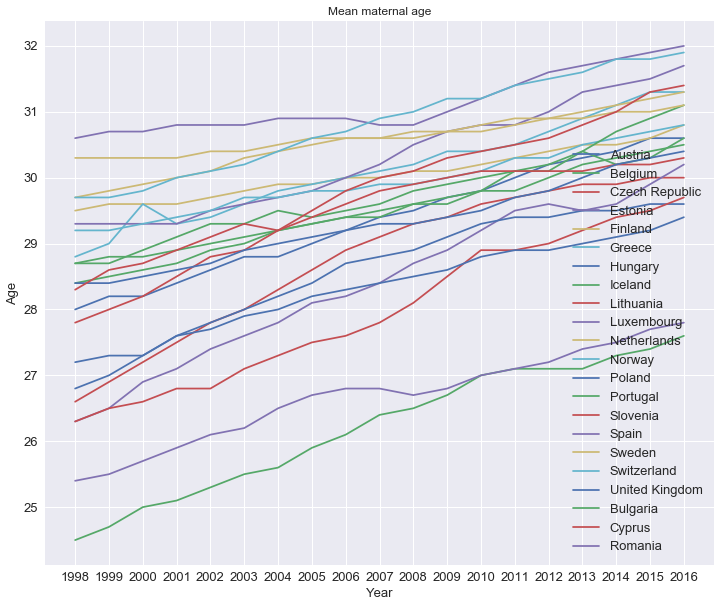

In [6]:
#plot
maternal_plot = mean_age_birth.plot(kind='line',figsize = (12,10), title = 'Mean maternal age', fontsize = 13)
maternal_plot.legend(loc = 'best', fontsize = 13)
maternal_plot.set_xlabel('Year', fontsize = 13)
maternal_plot.set_ylabel('Age', fontsize = 13)
maternal_plot.ticklabel_format(style='plain', axis='y') 
maternal_plot.set_xticks(cols)
plt.show()

# 1.2 Mean age of first birth

In [7]:
#datafram of general mean maternal of first age
mean_age_first_birth = mean_age_first_birth.drop(coun_2,axis=0)
mean_age_first_birth = mean_age_first_birth.T
mean_age_first_birth

Country Austria Belgium Czech Republic Estonia Finland Greece Hungary Iceland  \
1998       26.2      27           24.4    23.6    27.4   27.2    24.5    25.2   
1999       26.3    26.8           24.6    23.7    27.4   27.4    24.8    25.1   
2000       26.4      27             25    23.9    27.4     28    25.1    25.5   
2001       26.5      27           25.3    24.1    27.5   27.7    25.3    25.7   
2002       26.8    27.2           25.6    24.5    27.6   27.9    25.6      26   
2003       26.9    27.3           25.9    24.7    27.8   28.1    25.9    26.1   
2004         27    27.5           26.3    24.8    27.8   28.4    26.3    26.2   
2005       27.3    27.6           26.6    25.1    27.9   28.6    26.6    26.3   
2006       27.5    27.7           26.9    25.2      28   28.6    26.9    26.4   
2007       27.7    27.8           27.1    25.3    28.1   28.8    27.1    26.6   
2008       27.8    27.8           27.3    25.7    28.2   28.8    27.2    26.5   
2009         28    28.1           27.4      26    28.2     29    27.4    26.7   
2010       28.2      28           27.6    26.3    28.3   29.1    27.7    26.9   
2011       28.5    28.1           27.8    26.4    28.4   29.4    27.7    27.1   
2012       28.7    28.2           27.9    26.5    28.5   29.6    27.7    27.1   
2013       28.8    28.5           28.1    26.5    28.5   29.9    27.7    27.4   
2014         29    28.5           28.1    26.6    28.6     30    27.7    27.5   
2015       29.2    28.7           28.2    27.2    28.8   30.2    27.9    27.5   
2016       29.2    28.8           28.2    27.5      29   30.3    27.8    27.8   

Country Lithuania Luxembourg   ...   Poland Portugal Slovenia Spain Sweden  \
1998         23.6       27.9   ...     24.2     26.1     25.8  28.9   27.7   
1999         23.8       28.3   ...     24.3     26.4     26.1    29   27.9   
2000         23.9       28.3   ...     24.5     26.5     26.5  29.1   27.9   
2001         24.2       28.4   ...     24.8     26.6     26.7  29.2   28.2   
2002         24.3       28.8   ...       25     26.8     27.2  29.2   28.3   
2003         24.4       28.7   ...     25.2     27.1     27.3  29.3   28.5   
2004         24.7       28.7   ...     25.5     27.1     27.5  29.4   28.6   
2005         24.8       29.1   ...     25.7     27.3     27.7  29.4   28.7   
2006           25       28.5   ...     25.9     27.5     27.9  29.4   28.8   
2007         25.3       28.9   ...       26     27.6     28.1  29.4   28.8   
2008         25.6       29.2   ...       26     27.7     28.2  29.3   28.8   
2009           26       29.3   ...     26.2     27.9     28.2  29.6   28.9   
2010         26.4       29.5   ...     26.5     28.1     28.4  29.8   28.9   
2011         26.5       29.4   ...     26.6     28.4     28.4  30.1     29   
2012         26.6       29.6   ...     26.6     28.6     28.5  30.3   29.1   
2013         26.7         30   ...     26.7     28.9     28.5  30.4   29.1   
2014           27       30.2   ...     26.9     29.2     28.6  30.6   29.2   
2015         27.1       30.2   ...       27     29.5     28.7  30.7   29.2   
2016         27.3       30.5   ...     27.2     29.6     28.8  30.8   29.2   

Country Switzerland United Kingdom Bulgaria Cyprus Romania  
1998           28.5           26.9     22.9   25.7    23.4  
1999           28.5             27       23   25.8    23.5  
2000           28.7           27.1     23.5   26.2    23.6  
2001           28.8           27.2     23.7   26.4    23.8  
2002           28.9           27.3     23.8   26.7    24.1  
2003           29.1           27.5     24.1   26.9    24.2  
2004           29.3           27.5     24.3   27.2    24.5  
2005           29.5           27.6     24.6   27.5    24.8  
2006           29.4           27.6     24.9   27.8      25  
2007           29.6           27.7       25   28.2      25  
2008           29.7           27.6       25   28.3    25.1  
2009           29.8           27.7     25.2   28.4    25.1  
2010             30      

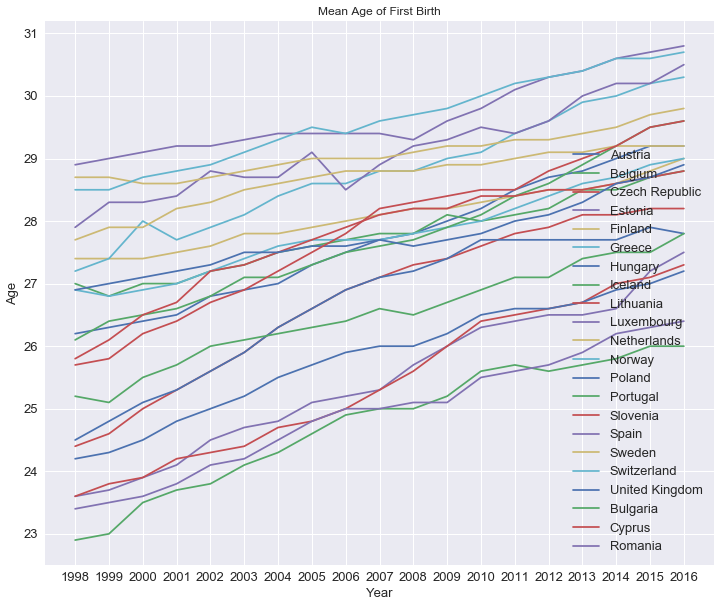

In [8]:
#plot
first_birth_plot = mean_age_first_birth.plot(kind='line',figsize = (12,10), title = 'Mean Age of First Birth', fontsize = 13)
first_birth_plot.legend(loc = 'best', fontsize = 13)
first_birth_plot.set_xlabel('Year', fontsize = 13)
first_birth_plot.set_ylabel('Age', fontsize = 13)
first_birth_plot.ticklabel_format(style='plain', axis='y') 
first_birth_plot.set_xticks(cols)
plt.show()

# 1.3 Compare the general mean maternal age to the mean age of first birth

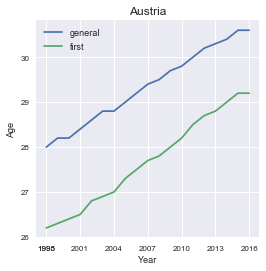

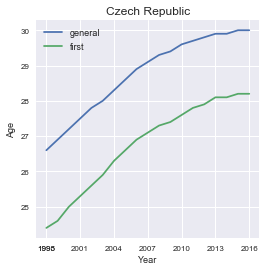

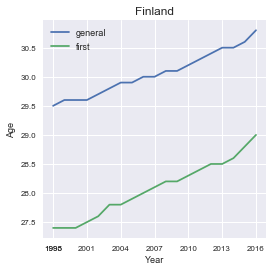

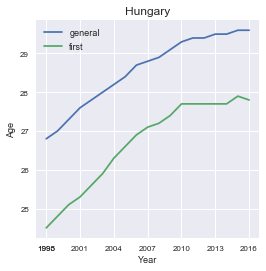

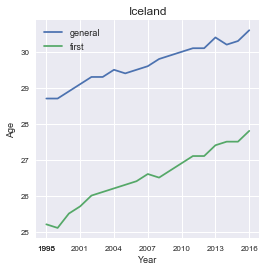

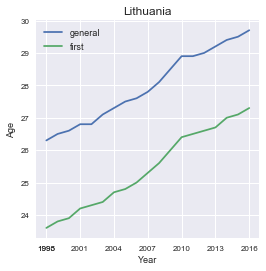

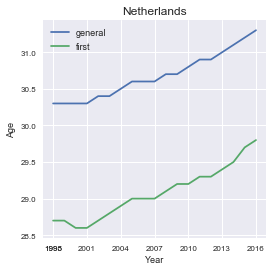

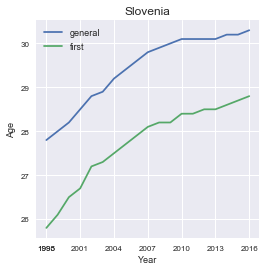

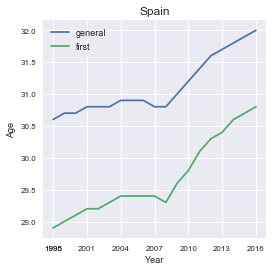

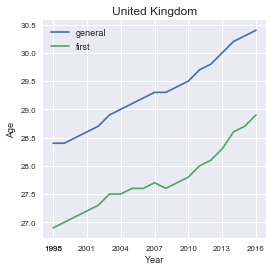

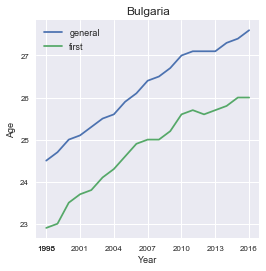

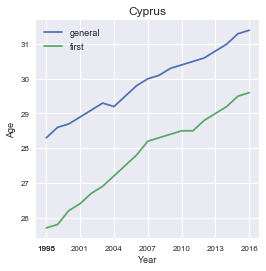

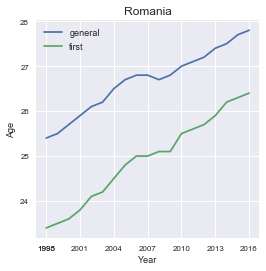

In [9]:
years=[]
for i in cols:
    if i%3 == 0:
        years.append(i)
years.append(1998)

#plot
for i in coun_select:
    plt.figure()
    mean_age_birth[i].plot(kind='line',figsize = (4,4), title = i, fontsize = 8,label='general')
    mean_age_first_birth[i].plot(kind='line',figsize = (4,4), title = i, fontsize = 8,label='first')
    plt.xlabel('Year', fontsize = 9)
    plt.ylabel('Age', fontsize = 9)
    plt.legend(loc = 'best', fontsize = 9)
    plt.ticklabel_format(style='plain', axis='y') 
    plt.xticks(years)
    plt.show()
    

# 2 Education Factor

# 2.1 Primary school

2.1.1 Adjusted net enrolment rate in primary school

In [10]:
#read in data of adjusted net enrolment rate in primary school
enroll_primary = pd.read_excel('Adjusted net enrolment rate, primary.xlsx', index_col=0, header=0)

#select the years of data
enroll_primary=enroll_primary[cols[:len(cols)]]

#select the countries
enroll_primary = enroll_primary.T
new_list = []
for a in coun_select:
    new_list.append(enroll_primary[a])
enroll_primary = pd.DataFrame(new_list)
enroll_primary = enroll_primary.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if enroll_primary[country][year]=='..':
            enroll_primary[country][year]=np.nan
enroll_primary_fill = enroll_primary.fillna(method='ffill')
enroll_primary_fill = enroll_primary_fill.fillna(method='bfill')
enroll_primary_fill

Austria    Belgium  Czech Republic    Estonia    Finland     Greece  \
1998      NaN  99.037621             NaN  99.983704  99.823837  96.924561   
1999      NaN  99.037621             NaN  99.983704  99.823837  96.924561   
2000      NaN  99.293259             NaN  99.977959  99.823837  98.324860   
2001      NaN  99.168480             NaN  99.976692  99.823837  97.573532   
2002      NaN  99.241631             NaN  99.976692  99.550484  97.605309   
2003      NaN  98.356133             NaN  98.062141  98.760551  97.686272   
2004      NaN  97.001770             NaN  97.126083  97.804932  96.828743   
2005      NaN  96.858650             NaN  96.522499  97.562439  96.049606   
2006      NaN  97.388100             NaN  95.780342  97.153572  95.702538   
2007      NaN  98.571564             NaN  96.948067  97.562943  96.432030   
2008      NaN  99.245941             NaN  96.169960  97.649590  96.432030   
2009      NaN  99.222527             NaN  95.674202  97.725563  96.432030   
2010      NaN  97.732880             NaN  98.608020  98.353070  93.209800   
2011      NaN  97.868780             NaN  99.769890  98.561450  93.544990   
2012      NaN  98.132690             NaN  99.812950  99.084400  93.845060   
2013      NaN  98.164250             NaN  98.220840  99.163080  93.342500   
2014      NaN  97.987380             NaN  94.577920  99.612870  92.299290   
2015      NaN  98.338970             NaN  94.275400  99.247820  93.346930   
2016      NaN  98.338970             NaN  94.275400  99.228870  93.346930   

        Hungary    Iceland  Lithuania  Luxembourg    ...         Poland  \
1998  96.185890  96.844902  97.948570   98.393471    ...      96.022011   
1999  96.185890  96.844902  97.948570   98.393471    ...      96.022011   
2000  96.737129  96.844902  97.938072   98.226120    ...      96.000717   
2001  97.184891  96.844902  97.754982   97.028358    ...      96.262306   
2002  97.296082  96.844902  97.800873   97.149078    ...      96.017868   
2003  96.024696  96.844902  96.090767   96.142342    ...      95.723618   
2004  95.648293  96.844902  92.068382   96.847351    ...      95.386528   
2005  96.170662  96.752151  91.597260   98.269142    ...      95.130219   
2006  96.828110  97.412086  93.225899   98.818832    ...      95.384941   
2007  96.613670  98.294701  96.514999   98.802849    ...      95.567810   
2008  97.919151  98.890312  98.837227   98.202789    ...      95.677116   
2009  98.835114  99.323227  99.319481   98.202789    ...      96.393539   
2010  97.711690  99.582910  99.350260   96.168800    ...      94.790590   
2011  97.044480  98.977300  98.121590   95.666520    ...      94.842280   
2012  96.572460  98.452870  98.039540   96.059200    ...      95.370310   
2013  96.213230  97.816420  98.538610   96.112490    ...      95.714350   
2014  96.408350  97.780900  99.743530   96.169060    ...      95.382480   
2015  96.545420  98.623340  99.867140   97.996950    ...      95.190250   
2016  96.988920  98.623340  99.878960   97.996950    ...      95.691580   

       Portugal   Slovenia      Spain     Sweden  Switzerland  United Kingdom  \
1998  99.507812  96.415512  99.912567  99.102547    99.693321       99.977417   
1999  99.507812  96.415512  99.912567  99.102547    99.693321       99.977417   
2000  99.507812  96.722893  99.984879  99.102547    99.697479       99.983231   
2001  99.507812  95.984360  99.933632  99.102547    99.758087       99.983231   
2002  99.507812  96.829613  99.940941  99.294357    99.784363       99.849777   
2003  99.507812  97.645561  99.904213  98.826347    99.814842       99.986122   
2004  99.507812  99.790977  99.825478  96.658562    99.242432       99.360764   
2005  99.507812  98.259087  99.585747  95.270714    98.406776       99.990463   
2006  99.507812  97.734993  99.622498  95.011559    97.982689       99.869392   
2007  99.507812  97.545883  99.843880  96.117889    98.099480       97.940987   
2008  99.507812  97.656502  99.931297  98.153282    98.852081       99.04

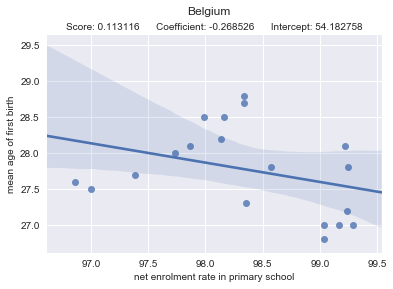

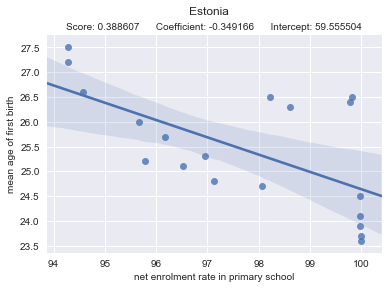

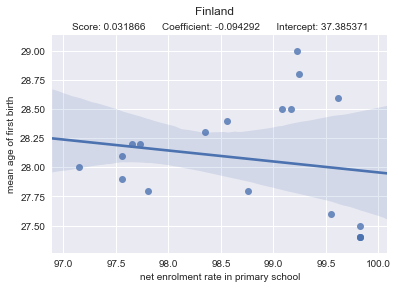

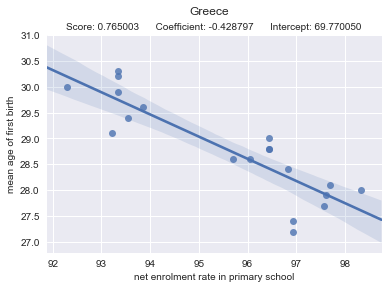

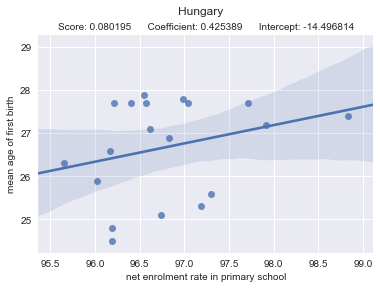

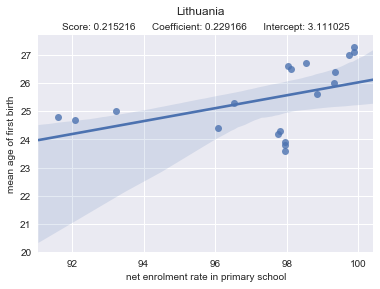

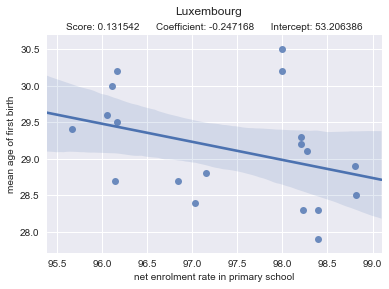

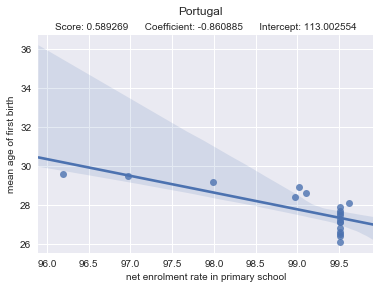

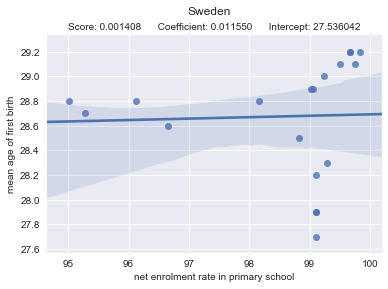

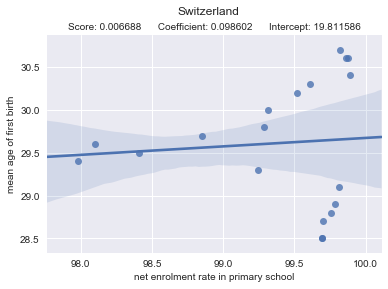

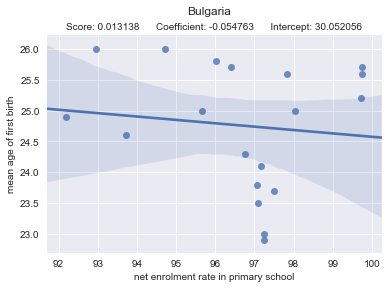

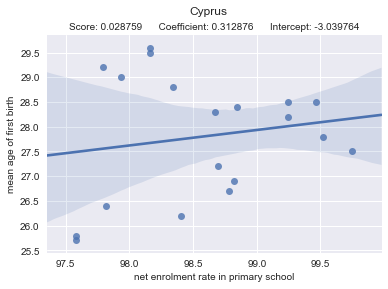

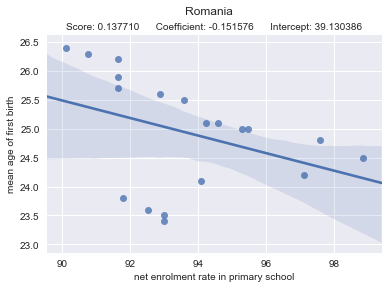

In [11]:
#correlation plot
for country in coun_select:
        if np.any(enroll_primary_fill[country].isnull())!= True:
            plt.figure()
            try:
                sns.regplot(x=enroll_primary_fill[country], y=mean_age_first_birth[country])
            except:
                TypeError
            plt.xlabel('net enrolment rate in primary school', fontsize = 10)
            plt.ylabel('mean age of first birth', fontsize = 10)
            plt.ticklabel_format(style='plain', axis='y') 
            x = enroll_primary_fill[country].tolist()
            x = np.reshape(x,newshape=(19,1))
            y = mean_age_first_birth[country].tolist()
            y = np.reshape(y,newshape=(19,1))
            lr = LinearRegression()
            lr.fit(x,y)
            plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
            plt.suptitle(country,fontsize=12)
            plt.show()
        else:
            pass


2.1.2 Rate of out-of-school children of primary school age

In [12]:
#read in data of rate of out-of-school children of primary school age
out_primary = pd.read_excel('Rate of out-of-school children of primary school age.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
out_primary=out_primary[cols[:len(cols)]]

#select the countries
out_primary = out_primary.T
new_list = []
for a in coun_select:
    new_list.append(out_primary[a])
out_primary = pd.DataFrame(new_list)
out_primary = out_primary.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if out_primary[country][year]=='..':
            out_primary[country][year]=np.nan
out_primary_fill = out_primary.fillna(method='ffill')
out_primary_fill = out_primary_fill.fillna(method='bfill')
out_primary_fill

Austria  Belgium  Czech Republic  Estonia  Finland   Greece  Hungary  \
1998      NaN  0.96238             NaN  0.01630  0.53928  3.43703  3.84567   
1999      NaN  0.96238             NaN  0.01630  0.53928  3.07544  3.81411   
2000      NaN  0.70674             NaN  0.02204  0.53928  1.67514  3.26287   
2001      NaN  0.83152             NaN  0.02331  0.17616  2.42647  2.81511   
2002      NaN  0.75837             NaN  0.02331  0.44952  2.39469  2.70392   
2003      NaN  1.64387             NaN  1.93786  1.23945  2.31373  3.97530   
2004      NaN  2.99823             NaN  2.87392  2.19507  3.17126  4.35171   
2005      NaN  3.14135             NaN  3.47750  2.43756  3.95039  3.82934   
2006      NaN  2.61190             NaN  4.21966  2.84643  4.29746  3.17189   
2007      NaN  1.42844             NaN  3.05193  2.43706  3.56797  3.38633   
2008      NaN  0.75406             NaN  3.83004  2.35041  3.56797  2.08085   
2009      NaN  0.77747             NaN  4.32580  2.27444  3.56797  1.16489   
2010      NaN  2.26712             NaN  1.39198  1.64693  6.79020  2.28831   
2011      NaN  2.13122             NaN  0.23011  1.43855  6.45501  2.95552   
2012      NaN  1.86731             NaN  0.18705  0.91560  6.15494  3.42754   
2013      NaN  1.83575             NaN  1.77916  0.83692  6.65750  3.78677   
2014      NaN  2.01262             NaN  5.42208  0.38713  7.70071  3.59165   
2015      NaN  1.66103             NaN  5.72460  0.75218  6.65307  3.45458   
2016      NaN  1.66103             NaN  5.72460  0.77113  6.65307  3.01108   

      Iceland  Lithuania  Luxembourg   ...      Poland  Portugal  Slovenia  \
1998  1.28732    2.17568     1.60653   ...     3.97799   0.49219   2.22985   
1999  1.28732    2.05143     1.60653   ...     3.97799   0.49219   3.58449   
2000  1.28732    2.06193     1.77388   ...     3.99928   0.49219   3.27711   
2001  1.28732    2.24502     2.97164   ...     3.73769   0.49219   4.01564   
2002  1.28732    2.19913     2.85092   ...     3.98213   0.49219   3.17039   
2003  1.28732    3.90923     3.85766   ...     4.27638   0.49219   2.35444   
2004  3.15510    7.93162     3.15265   ...     4.61347   0.49219   0.20902   
2005  3.24785    8.40274     1.73086   ...     4.86978   0.49219   1.74091   
2006  2.58791    6.77410     1.18117   ...     4.61506   0.49219   2.26501   
2007  1.70530    3.48500     1.19715   ...     4.43219   0.49219   2.45412   
2008  1.10969    1.16277     1.79721   ...     4.32288   0.49219   2.34350   
2009  0.67677    0.68052     1.79721   ...     3.60646   0.49219   2.45928   
2010  0.41709    0.64974     3.83120   ...     5.20941   0.38918   2.22785   
2011  1.02270    1.87841     4.33348   ...     5.15772   1.02927   1.80339   
2012  1.54713    1.96046     3.94080   ...     4.62969   0.89600   1.13991   
2013  2.18358    1.46139     3.88751   ...     4.28565   0.97608   1.64266   
2014  2.21910    0.25647     3.83094   ...     4.61752   2.01706   1.82420   
2015  1.37666    0.13286     2.00305   ...     4.80975   3.02398   1.36765   
2016  1.37666    0.12104     2.00305   ...     4.30842   3.80450   1.36765   

        Spain   Sweden  Switzerland  United Kingdom  Bulgaria   Cyprus  \
1998  0.08743  0.89745      0.30668         0.16887   3.67003  2.41612   
1999  0.08743  0.89745      0.30668         0.02258   2.75397  2.41612   
2000  0.01512  0.89745      0.30252         0.01677   2.91721  1.59503   
2001  0.06637  0.89745      0.24191         0.01677   2.50126  2.18324   
2002  0.05906  0.70564      0.21564         0.15022   2.92800  1.21913   
2003  0.09579  1.17365      0.18516         0.01388   2.83497  1.18020   
2004  0.17452  3.34144      0.75757         0.63924   3.25161  1.30564   
2005  0.41425  4.72929      1.59322         0.00954   6.28933  0.25357   
2006  0.37750  4.98844      2.01731         0.13061   7.80314  0.48307   
2007  0.15612  3.88211      1.90052         2.05901   4.33959  0.75805   
2008  0.06870  1.84672      1.14792         0.95635   1.97363  1.33024

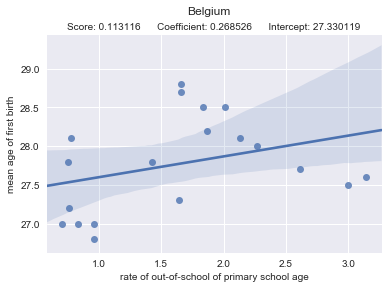

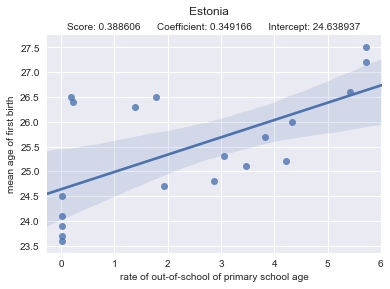

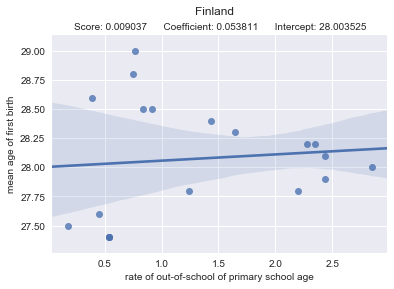

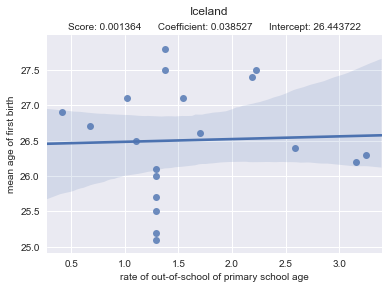

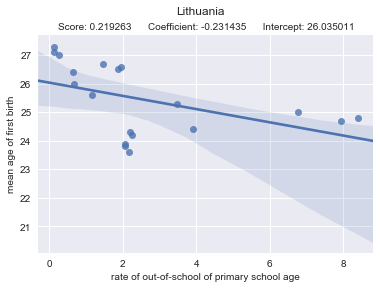

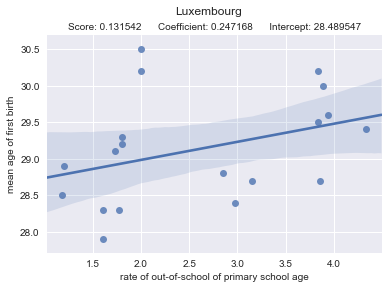

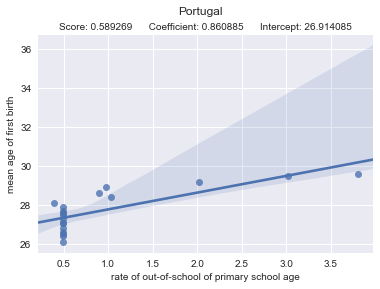

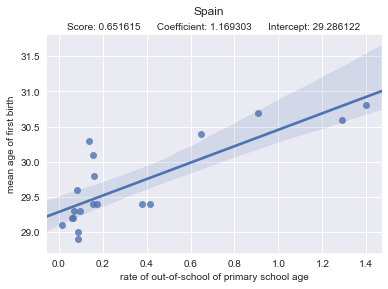

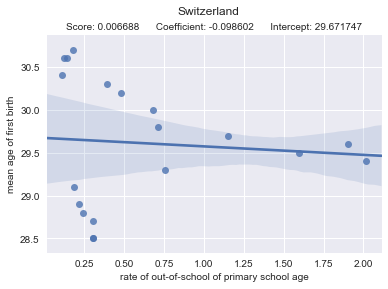

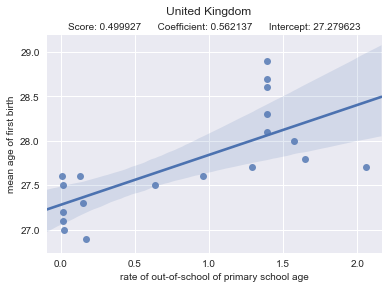

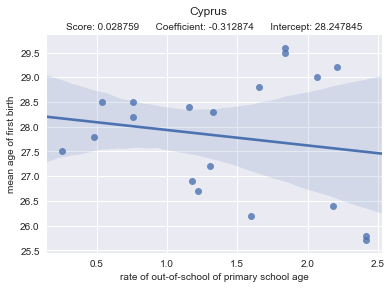

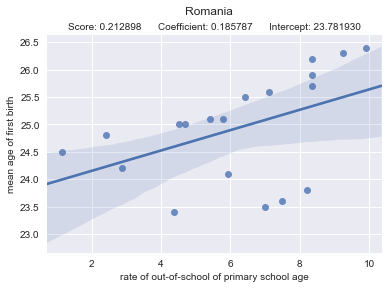

In [13]:
#correlation plot
for country in coun_select:
        if np.any(out_primary_fill[country].isnull())!= True:
            plt.figure()
            try:
                sns.regplot(x=out_primary_fill[country], y=mean_age_first_birth[country])
            except:
                TypeError
            plt.xlabel('rate of out-of-school of primary school age', fontsize = 10)
            plt.ylabel('mean age of first birth', fontsize = 10)
            plt.ticklabel_format(style='plain', axis='y') 
            x = out_primary_fill[country].tolist()
            x = np.reshape(x,newshape=(19,1))
            y = mean_age_first_birth[country].tolist()
            y = np.reshape(y,newshape=(19,1))
            lr = LinearRegression()
            lr.fit(x,y)
            plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
            plt.suptitle(country,fontsize=12)
            plt.show()
        else:
            pass


# 2.2 Lower secondary school

2.2.1 Adjusted net enrolment rate in lower secondary school

In [14]:
#read in data of adjusted net enrolment rate in lower secondary school
enroll_lower = pd.read_excel('Adjusted net enrolment rate, lower secondary.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
enroll_lower=enroll_lower[cols[:len(cols)]]

#select the countries
enroll_lower = enroll_lower.T
new_list = []
for a in coun_select:
    new_list.append(enroll_lower[a])
enroll_lower = pd.DataFrame(new_list)
enroll_lower = enroll_lower.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if enroll_lower[country][year]=='..':
            enroll_lower[country][year]=np.nan
enroll_lower_fill = enroll_lower.fillna(method='ffill')
enroll_lower_fill = enroll_lower_fill.fillna(method='bfill')
enroll_lower_fill


Austria    Belgium  Czech Republic    Estonia    Finland     Greece  \
1998      NaN  60.577511             NaN  96.405380  99.421631  90.427223   
1999      NaN  60.577511             NaN  96.226181  99.332619  89.458069   
2000      NaN  60.577511             NaN  95.717087  97.164688  88.570084   
2001      NaN  60.577511             NaN  95.873062  95.453003  90.144127   
2002      NaN  60.577511             NaN  95.847267  96.704170  90.209534   
2003      NaN  60.577511             NaN  96.303291  98.509933  91.083099   
2004      NaN  60.577511             NaN  96.698418  98.414413  90.673241   
2005      NaN  58.898392             NaN  97.179916  98.549332  91.528748   
2006      NaN  58.898392             NaN  98.011414  98.241592  90.364250   
2007      NaN  58.898392             NaN  97.214920  97.423470  88.203590   
2008      NaN  58.898392             NaN  94.949364  96.822372  88.203590   
2009      NaN  58.898392             NaN  93.164368  95.828651  88.203590   
2010      NaN  85.897310             NaN  94.077090  96.603040  90.743710   
2011      NaN  86.530070             NaN  96.434340  96.966800  90.743710   
2012      NaN  86.559430             NaN  98.375900  96.588660  90.743710   
2013      NaN  87.179060             NaN  97.419830  97.660700  88.724870   
2014      NaN  87.658650             NaN  92.103390  97.370440  87.308140   
2015      NaN  86.420990             NaN  92.166830  97.346070  90.500660   
2016      NaN  86.420990             NaN  92.166830  97.104390  90.500660   

        Hungary    Iceland  Lithuania  Luxembourg    ...         Poland  \
1998  94.755333  97.921333  98.926682   87.940262    ...      94.805130   
1999  94.673920  95.577202  96.784973   87.940262    ...      94.805130   
2000  93.832497  92.901680  97.215668   88.480087    ...      93.280861   
2001  95.052170  92.946663  97.119881   81.212936    ...      92.046181   
2002  96.619560  96.270576  96.912689   80.235909    ...      92.951759   
2003  97.160812  97.373680  97.236397   80.413948    ...      93.388748   
2004  95.960869  99.925842  97.884949   78.603554    ...      94.630157   
2005  97.674591  99.895912  98.064407   88.587158    ...      95.378479   
2006  96.999741  98.467812  97.472862   87.799622    ...      95.222931   
2007  95.929161  99.158920  96.522324   89.052559    ...      94.034790   
2008  95.982239  99.868294  94.470291   90.102226    ...      92.787941   
2009  95.810547  98.647461  92.985046   90.102226    ...      92.107819   
2010  93.009640  95.435930  92.318830   92.643910    ...      91.292290   
2011  93.232190  95.711710  93.468000   91.369770    ...      91.198100   
2012  94.050190  96.999540  95.446700   90.907130    ...      91.725930   
2013  94.505860  98.758250  96.477100   90.005340    ...      91.964410   
2014  94.783820  99.968560  96.625500   91.454180    ...      92.579110   
2015  94.975220  99.936640  96.707120   90.759010    ...      93.399540   
2016  94.325470  99.936640  96.657530   90.759010    ...      94.012730   

       Portugal   Slovenia      Spain      Sweden  Switzerland  \
1998  79.990631  93.691963  95.077187   99.494057    93.221062   
1999  79.990631  94.562691  95.077187   99.494057    93.221062   
2000  76.157806  97.297081  95.037743   99.911652    94.904984   
2001  83.647346  96.088531  96.184013   99.993111    94.978142   
2002  83.112411  96.800171  96.791054   99.989769    95.497849   
2003  84.312569  96.099617  96.717018   99.984367    96.144737   
2004  84.312569  94.666267  96.649727  100.000000    96.207916   
2005  82.556442  93.344521  96.350571   99.994598    96.236572   
2006  82.738449  92.146408  96.370682   99.996223    96.504730   
2007  82.738449  96.119011  96.291260   98.171150    95.615997   
2008  82.738449  97.438400  96.159752   95.215073    93.694237   
2009  82.738449  97.529678  96.075912   92.269203    92.453819   
2010  82.738449  97.118020  95.856250   91.954520    93.422530   
2011  82.738449  95.651070  95.863990   

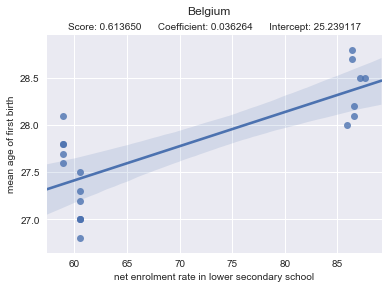

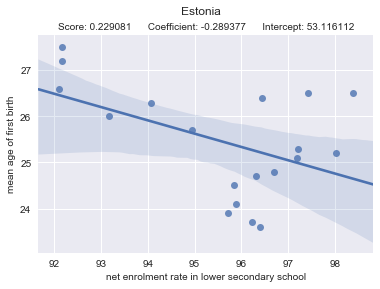

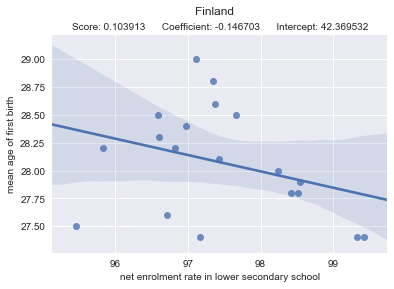

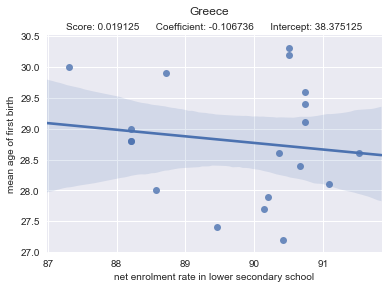

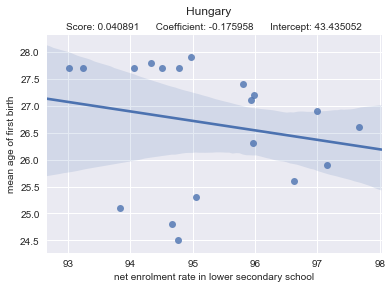

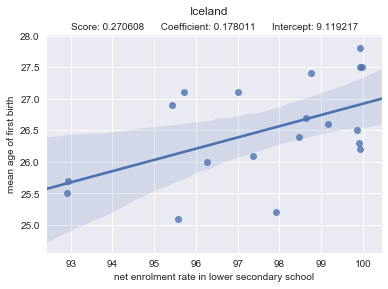

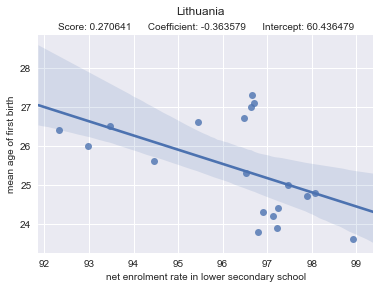

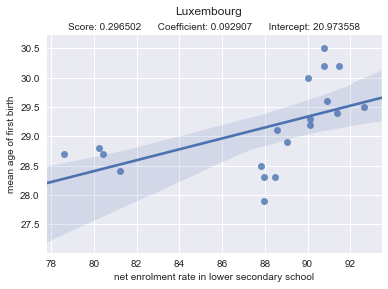

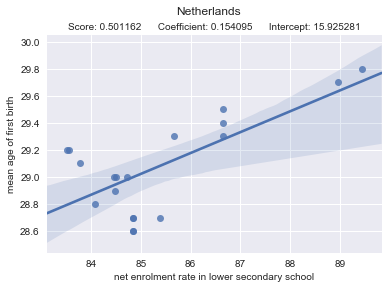

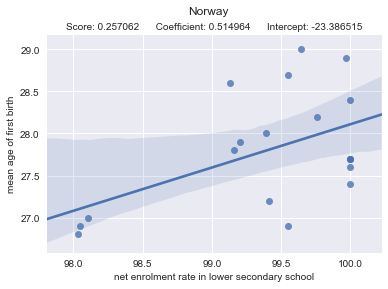

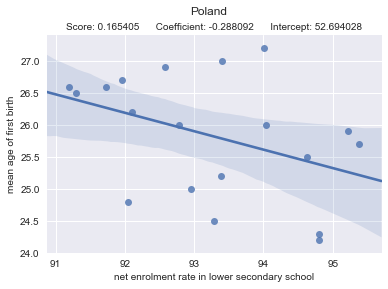

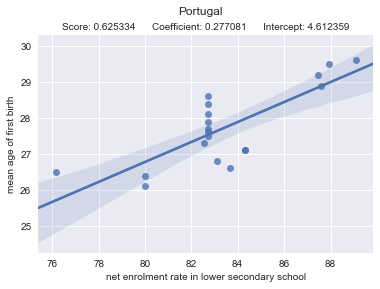

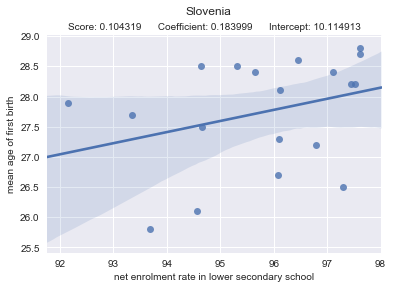

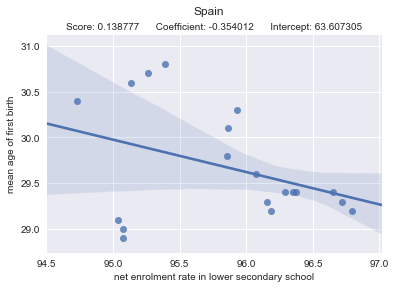

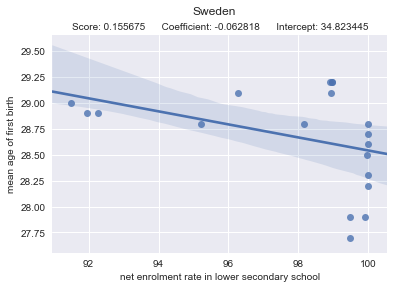

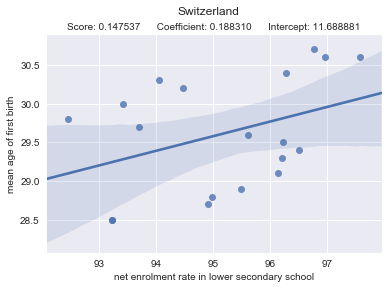

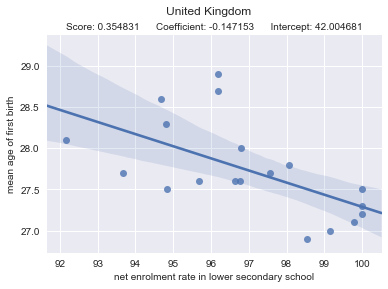

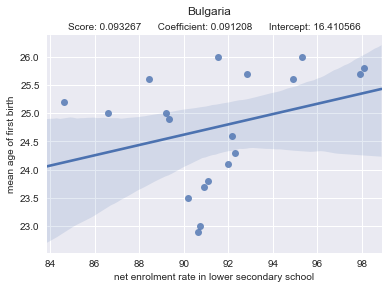

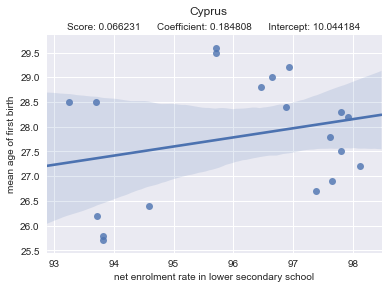

In [15]:
#correlation plot
for country in coun_select:
    if np.any(enroll_lower_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=enroll_lower_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('net enrolment rate in lower secondary school', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = enroll_lower_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
    else:
        pass

2.2.2 Rate of out-of-school adolescents of lower secondary school age

In [16]:
#read in data of rate of out-of-school adolescents of lower secondary school age
out_lower = pd.read_excel('Rate of out-of-school adolescents of lower secondary school age.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
out_lower= out_lower[cols[:len(cols)]]

#select the countries
out_lower = out_lower.T
new_list = []
for a in coun_select:
    new_list.append(out_lower[a])
out_lower = pd.DataFrame(new_list)
out_lower = out_lower.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if out_lower[country][year]=='..':
            out_lower[country][year]=np.nan
out_lower_fill = out_lower.fillna(method='ffill')
out_lower_fill = out_lower_fill.fillna(method='bfill')
out_lower_fill

Austria    Belgium  Czech Republic  Estonia  Finland    Greece  Hungary  \
1998      NaN  27.561199             NaN  1.09678  0.06105   6.95975  1.76295   
1999      NaN  27.561199             NaN  1.09678  0.06105   7.88856  1.79806   
2000      NaN  27.561199             NaN  1.09678  2.19268   8.56443  2.64420   
2001      NaN  27.561199             NaN  1.09678  3.13337   6.78009  1.82203   
2002      NaN  27.561199             NaN  1.09678  1.88564   6.20553  0.62384   
2003      NaN  27.561199             NaN  1.09678  1.88564   5.29217  0.62384   
2004      NaN  27.561199             NaN  1.09678  1.88564   6.10989  0.62384   
2005      NaN  29.431780             NaN  1.09678  1.88564   5.29277  0.62384   
2006      NaN  29.431780             NaN  1.09678  1.88564   6.32937  0.51769   
2007      NaN  29.431780             NaN  1.09678  1.09566   9.38536  1.61103   
2008      NaN  29.431780             NaN  3.65918  1.78331   9.38536  1.55257   
2009      NaN  29.431780             NaN  5.64847  2.62561   9.38536  1.74650   
2010      NaN   2.303120             NaN  4.67492  1.87937   6.55231  4.71394   
2011      NaN   1.669460             NaN  2.47226  1.51823   6.55231  4.51536   
2012      NaN   1.591750             NaN  2.47226  1.80818   6.55231  3.57432   
2013      NaN   0.887700             NaN  2.47226  0.78398   9.10019  3.07645   
2014      NaN   0.913280             NaN  2.47226  1.12280  10.63212  2.84115   
2015      NaN   2.619200             NaN  2.47226  0.72401   7.08283  2.86212   
2016      NaN   2.619200             NaN  2.47226  1.04847   7.08283  3.50047   

      Iceland  Lithuania  Luxembourg   ...      Poland  Portugal  Slovenia  \
1998  1.80684    0.26896     5.77628   ...     2.56725   1.23932   5.17365   
1999  4.31103    0.26896     5.77628   ...     2.56725   1.23932   4.21633   
2000  7.03437    0.26896     4.13394   ...     2.56725   1.23932   1.65631   
2001  6.95694    0.26896    11.46900   ...     5.71603   1.23932   3.02250   
2002  6.95694    0.26896    12.49017   ...     5.56162   1.23932   2.06277   
2003  6.95694    0.26896    11.94583   ...     5.22847   1.23932   3.09878   
2004  6.95694    0.26896    13.81464   ...     4.00393   1.23932   4.50399   
2005  6.95694    0.26896     3.88991   ...     3.36494   1.23932   4.13810   
2006  6.95694    1.36723     3.83509   ...     3.52692   1.23932   2.81218   
2007  0.73779    2.43574     3.40561   ...     4.71136   1.23932   3.48407   
2008  0.73779    4.59773     1.92844   ...     5.95018   1.23932   1.85159   
2009  1.23493    6.29444     1.92844   ...     6.59434   1.23932   1.09516   
2010  4.50556    7.02268     0.43934   ...     7.43761   1.23932   1.34180   
2011  4.27325    5.94121     1.88095   ...     7.46277   1.23932   2.43468   
2012  2.93891    3.97739     3.03817   ...     6.91173   1.23932   3.46819   
2013  1.22603    3.03164     4.51096   ...     6.68605   1.23932   2.41157   
2014  1.22603    2.93684     2.82727   ...     6.03500   1.23932   1.53579   
2015  1.22603    2.84292     3.63422   ...     5.23116   1.23932   0.08765   
2016  1.22603    2.90162     3.63422   ...     4.74751   1.23932   0.08765   

        Spain   Sweden  Switzerland  United Kingdom  Bulgaria   Cyprus  \
1998  2.40641  0.49453      2.82796         1.47002   4.87642  3.46803   
1999  2.40641  0.49453      2.82796         0.83615   5.17244  3.46803   
2000  2.28025  0.07406      1.21807         0.20333   5.57235  4.78566   
2001  1.06969  0.07406      1.31834         0.20333   4.46565  3.79762   
2002  0.18852  0.07406      0.68012         0.20333   4.18675  0.13998   
2003  0.18852  0.07406      0.68012         0.20333   3.30194  0.13998   
2004  0.18852  0.07406      0.68012         0.20333   3.10004  0.13998   
2005  0.18852  0.07406      0.68012         0.20333   3.36983  0.13998   
2006  0.18852  0.07406      0.68012         0.26009   6.60568  0.13998   
2007  0.18852  1.82885      1.19864         3.60645   7.56586  0.13998   
2008  0.18

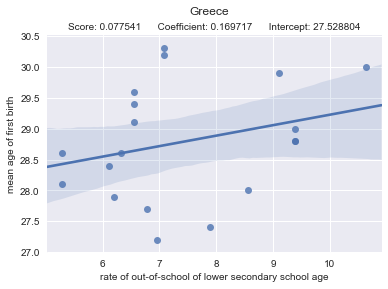

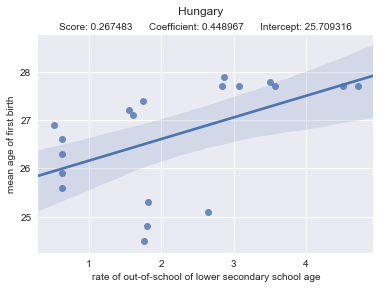

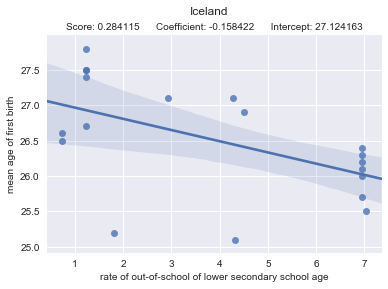

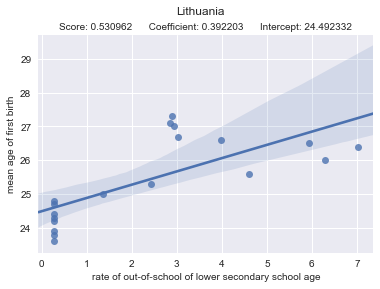

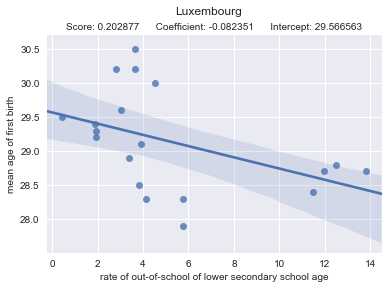

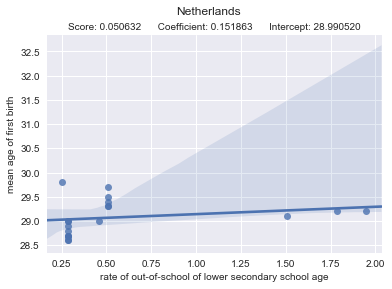

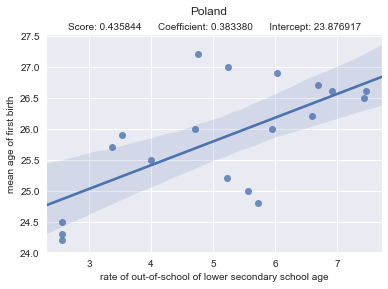

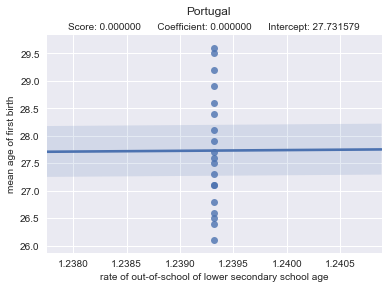

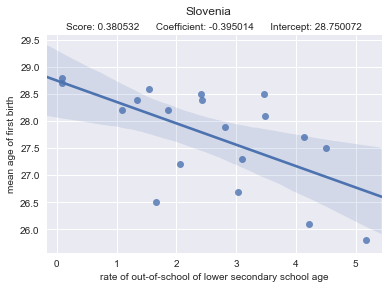

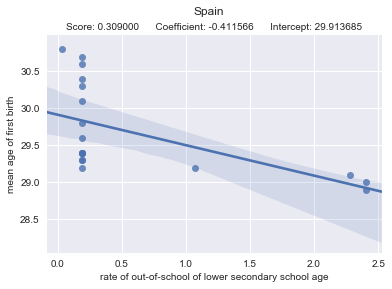

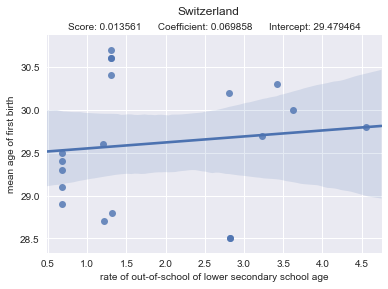

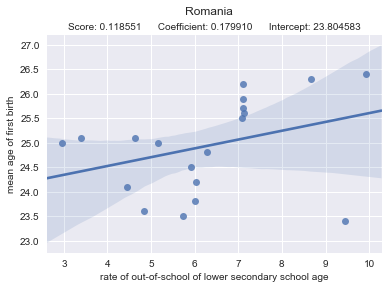

In [17]:
#correlation plot
for country in coun_select:
    if np.any(out_lower_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=out_lower_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('rate of out-of-school of lower secondary school age', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y')
        x = out_lower_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

# 2.3 Upper secondary school

2.3.1 Rate of out-of-school youth of upper secondary school age

In [18]:
#read in data of rate of out-of-school youth of upper secondary school age
out_upper = pd.read_excel('Rate of out-of-school youth of upper secondary school age.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
out_upper=out_upper[cols[:len(cols)]]

#select the countries
out_upper = out_upper.T
new_list = []
for a in coun_select:
    new_list.append(out_upper[a])
out_upper = pd.DataFrame(new_list)
out_upper = out_upper.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if out_upper[country][year]=='..':
            out_upper[country][year]=np.nan
out_upper_fill = out_upper.fillna(method='ffill')
out_upper_fill = out_upper_fill.fillna(method='bfill')
out_upper_fill

Austria  Belgium  Czech Republic   Estonia  Finland    Greece   Hungary  \
1998      NaN  4.07439             NaN  27.92119  9.38412  17.62321  24.30155   
1999      NaN  4.07439             NaN  10.82207  8.94099  17.93767  18.13489   
2000      NaN  4.07439             NaN   7.29402  6.12976  17.77935  15.64290   
2001      NaN  4.07439             NaN   5.34035  5.08301  17.46018  12.62770   
2002      NaN  4.07439             NaN   4.14480  5.90975  15.87085  11.04540   
2003      NaN  4.07439             NaN   4.45291  7.17794  19.32719   9.81886   
2004      NaN  4.07439             NaN   6.09388  9.38973  17.32846  13.04016   
2005      NaN  2.69250             NaN   4.78445  7.48825   7.50886  11.54906   
2006      NaN  2.69250             NaN   3.32717  6.21824   9.02284  10.89127   
2007      NaN  2.69250             NaN   2.01968  4.59155  13.91235   9.94767   
2008      NaN  2.69250             NaN   2.50444  5.54461  13.91235   9.36637   
2009      NaN  2.69250             NaN   3.88128  6.28175  13.91235   8.99634   
2010      NaN  2.97860             NaN   6.33960  7.67282   8.68967   9.84350   
2011      NaN  3.31340             NaN   8.81634  8.81446   8.68967  11.77824   
2012      NaN  2.58129             NaN  10.94397  9.52583   8.68967  11.73125   
2013      NaN  2.15439             NaN   9.79295  7.16783   9.05529  10.69667   
2014      NaN  2.15274             NaN   7.35886  6.95552  10.76944  10.74228   
2015      NaN  1.73459             NaN   5.14897  5.56350  11.60398  12.21652   
2016      NaN  1.73459             NaN   5.14897  4.03983  11.60398  12.31768   

       Iceland  Lithuania  Luxembourg    ...       Poland  Portugal  Slovenia  \
1998  21.44997   22.94920    14.92326    ...      9.95217  13.08743  11.11015   
1999  20.35736   17.61417    14.92326    ...      9.95217  13.08743   9.46339   
2000  20.73995   16.10574    15.10405    ...     10.88274   8.72297   9.22236   
2001  22.34320    7.30059    13.85153    ...      8.00680  18.06061   7.76439   
2002  21.00960    3.03001    15.34551    ...      7.92804  19.77311   8.55054   
2003  20.93631    0.58072    15.62913    ...      8.26959  17.65978   7.59292   
2004  22.31622    0.58072    15.04416    ...     11.58088  17.65978   8.00165   
2005  19.58333    0.58072    16.69087    ...      9.90787  14.95664   7.39333   
2006  17.59216    0.01960    15.81132    ...      9.53517  14.71960   6.63727   
2007  14.93642    2.65580    16.74931    ...      8.85878  14.71960   6.89558   
2008  15.86082    0.27782    16.34520    ...      8.40921  14.71960   8.12061   
2009  16.79010    0.27782    16.34520    ...      8.38047  14.71960   7.76637   
2010  15.60934    0.27782    14.54922    ...      9.56576  14.71960   5.68985   
2011  17.89218    2.32207    14.05309    ...     10.27815  14.71960   5.04666   
2012  17.82636   10.69530    14.36044    ...     10.98588  14.71960   4.28583   
2013  16.35320   11.93443    15.32060    ...      9.03446   4.10420   3.43674   
2014  16.55405    9.64436    16.70794    ...      9.27673   2.92029   5.19892   
2015  15.56381    8.08526    17.01625    ...      7.23162   2.92029   3.39139   
2016  15.56381    7.78052    17.01625    ...      6.92797   2.92029   3.39139   

         Spain   Sweden  Switzerland  United Kingdom  Bulgaria    Cyprus  \
1998  19.88603  3.42995     27.17942         8.76818  22.45447  12.90420   
1999  19.88603  3.42995     27.17942         7.07805  21.30235  12.90420   
2000  16.02080  5.05117     27.52371         7.99251  19.56039  14.64001   
2001  14.14208  8.66867     26.01439         7.73708  18.75084  15.45837   
2002  13.57866  4.93971     24.95937         5.61595  17.77949   9.68199   
2003  13.48741  4.30846     25.31029         5.08838  20.26180   6.75482   
2004  11.83284  1.70794     25.22466         2.60297  18.20900   9.87437   
2005  10.10139  3.35436     24.29544         2.42438  17.59756   6.98981   
2006   9.46232  2.40885     23.69961         6.87614  16.34861   6.70624   
2007

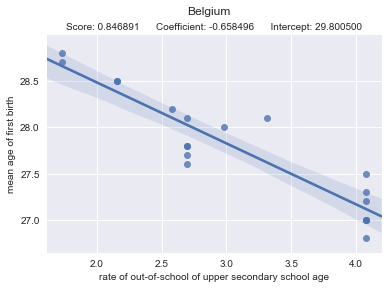

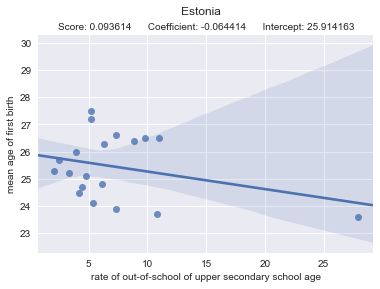

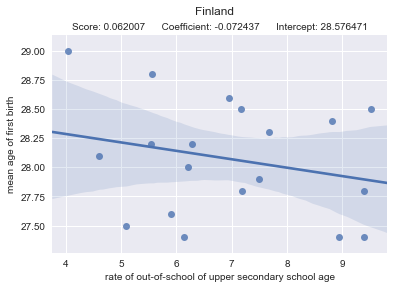

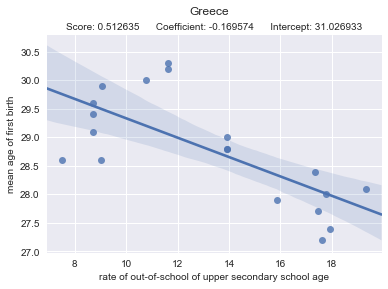

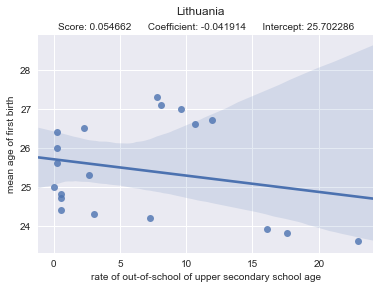

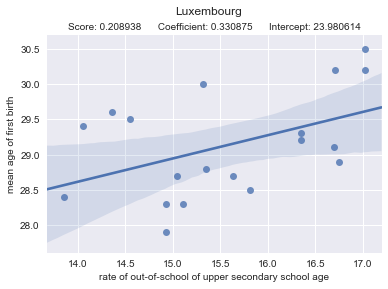

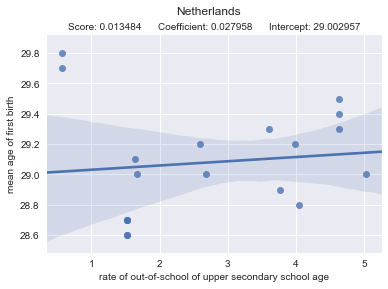

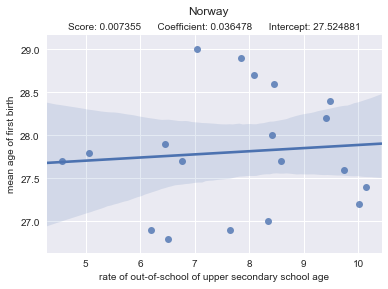

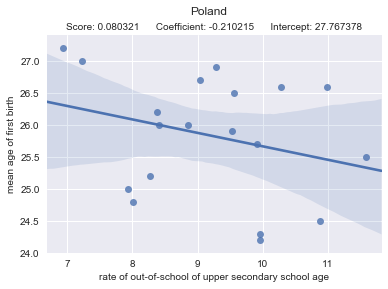

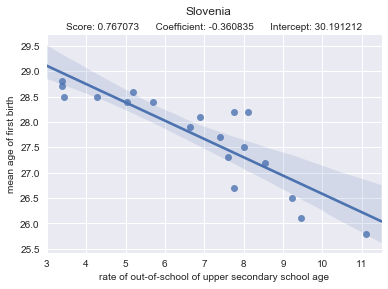

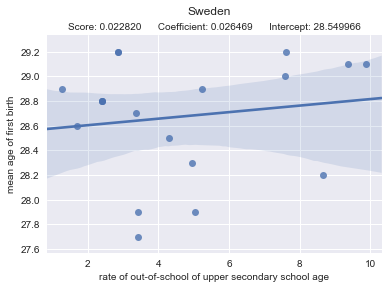

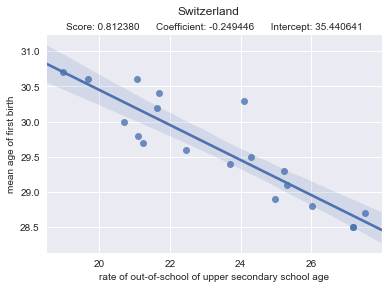

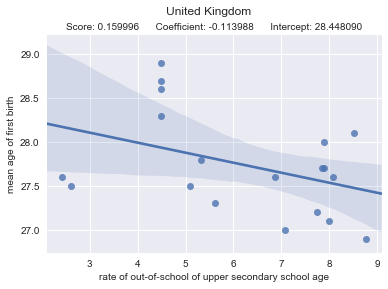

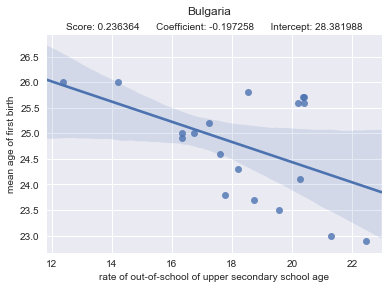

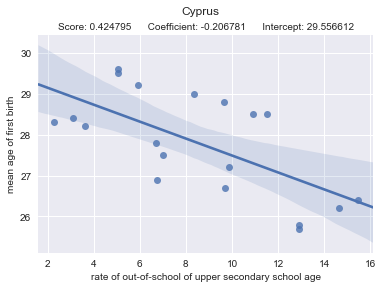

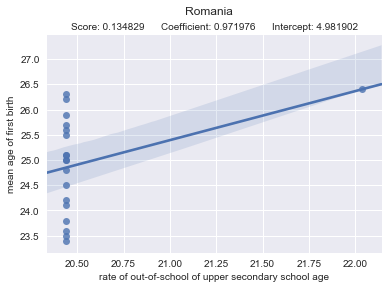

In [19]:
#correlation plot
for country in coun_select:
    if np.any(out_upper_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=out_upper_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('rate of out-of-school of upper secondary school age', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = out_upper_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
    
    else:
        pass

# 2.4 Tertiary education

2.4.1 Gross enrolment ratio of tertiary education

In [20]:
#read in data of gross enrolment ratio, tertiary
enroll_tertiary = pd.read_excel('Gross enrolment ratio, tertiary.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
enroll_tertiary=enroll_tertiary[cols[:len(cols)]]

#select the countries
enroll_tertiary = enroll_tertiary.T
new_list = []
for a in coun_select:
    new_list.append(enroll_tertiary[a])
enroll_tertiary = pd.DataFrame(new_list)
enroll_tertiary = enroll_tertiary.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if enroll_tertiary[country][year]=='..':
            enroll_tertiary[country][year]=np.nan
enroll_tertiary_fill = enroll_tertiary.fillna(method='ffill')
enroll_tertiary_fill = enroll_tertiary_fill.fillna(method='bfill')
enroll_tertiary_fill

Austria    Belgium  Czech Republic    Estonia     Finland      Greece  \
1998  52.544891  60.547031       23.423670  55.890060   86.748749   47.410858   
1999  55.630829  60.547031       25.981091  58.798691   89.898682   49.408840   
2000  58.856659  60.937859       28.951160  65.641953   90.485542   54.043941   
2001  60.162659  62.393951       30.817810  72.735840   92.934769   63.668621   
2002  50.018459  63.647980       36.190922  78.001259   93.975922   71.957848   
2003  50.124298  64.756561       38.450722  81.623169   95.282066   77.252571   
2004  51.242329  66.813530       45.922951  84.063263   97.949303   84.853958   
2005  52.169418  67.743446       52.121189  85.799278  100.634987   92.716049   
2006  54.123409  68.766571       55.303940  85.839973  102.873749   95.780739   
2007  55.950630  68.359787       60.839008  84.997368  103.962967   90.944923   
2008  60.845181  69.295731       66.297943  84.522491  105.607101   90.944923   
2009  65.721527  72.444862       71.126312  85.191292  101.594437   90.944923   
2010  65.721527  75.922540       74.890750  85.862530  103.075720  103.714980   
2011  65.721527  78.313870       77.268360  86.851790  105.004670  107.868450   
2012  65.721527  80.146710       77.340550  88.369680  101.972980  110.763600   
2013  65.721527  81.540950       76.737920  89.051340   99.775620  111.680330   
2014  86.103680  82.772460       76.884140  88.611100   97.258200  116.855260   
2015  87.859800  84.663670       75.655980  87.383270   95.813160  116.855260   
2016  90.825890  84.663670       75.655980  87.383270   94.518140  116.855260   

        Hungary     Iceland   Lithuania  Luxembourg    ...         Poland  \
1998  33.271580   46.946270   47.119080    11.01203    ...      46.200531   
1999  36.079208   50.441120   53.378380    11.01203    ...      53.230129   
2000  39.654671   56.945770   61.044300    11.01203    ...      59.333832   
2001  44.552879   60.285229   67.698761    11.01203    ...      65.846550   
2002  50.424030   68.971359   74.960831    11.01203    ...      68.927483   
2003  60.617340   80.024490   83.879982    13.28043    ...      70.301376   
2004  70.352913   89.487083   91.531090    13.28043    ...      71.451218   
2005  77.599350   92.886787   98.485329    13.28043    ...      74.073593   
2006  80.638557   95.299110  100.140350    11.00372    ...      75.785362   
2007  80.127876   93.997780  101.036369    11.00372    ...      77.519867   
2008  76.240021   97.595627  103.627731    10.41055    ...      80.975937   
2009  71.550873   97.542381  106.234360    10.41055    ...      83.623688   
2010  73.779500  101.542690  103.186500    19.23236    ...      90.757370   
2011  71.794630  102.598430   96.547590    19.23236    ...      91.725430   
2012  70.015440  103.856870   91.739970    20.66450    ...      90.861480   
2013  64.560860  101.799640   85.831450    20.66450    ...      88.141350   
2014  58.858360  104.149900   81.680140    20.66450    ...      83.199940   
2015  54.677750   98.049060   79.390880    20.76787    ...      80.737530   
2016  53.463400   98.049060   77.469320    20.76787    ...      80.594660   

       Portugal    Slovenia      Spain      Sweden  Switzerland  \
1998  49.774200   52.261799  57.517799   59.653820    29.013571   
1999  51.138439   60.779400  59.929470   74.694969    30.914280   
2000  55.112820   64.117081  62.820461   79.730759    32.303181   
2001  58.836590   70.150757  64.568321   84.776077    34.109451   
2002  61.518810   78.654388  67.422333   91.536713    35.639431   
2003  63.364639   79.623917  70.051720   99.261238    39.212681   
2004  63.739861   84.148827  73.331337  102.076210    41.253040   
2005  63.050030   93.441727  74.391663   99.958733    42.423359   
2006  62.456341   98.223450  76.130272   96.744720    43.919079   
2007  63.582039  100.977081  77.533470   92.069710    45.263390   
2008  67.142372  102.420013  79.376648   87.911774    48.491920   
2009  68.010918  103.685860  82.173859   8

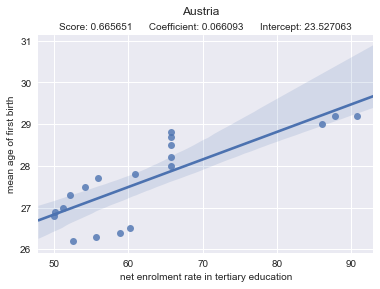

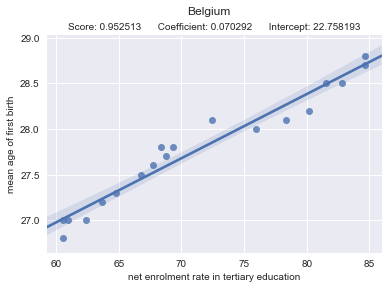

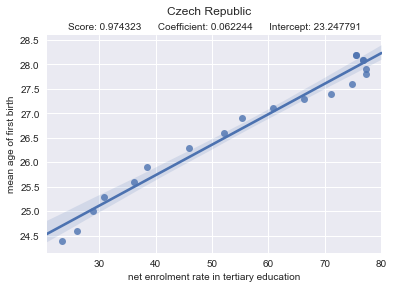

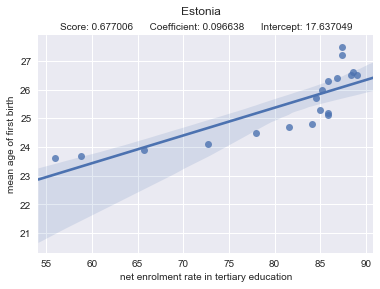

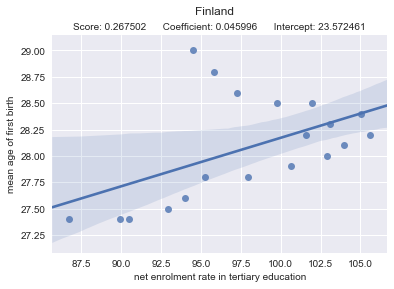

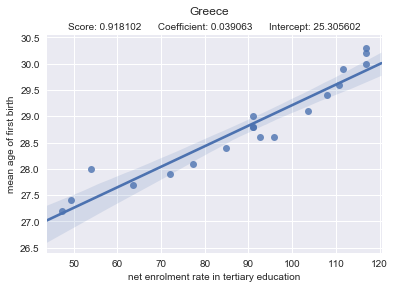

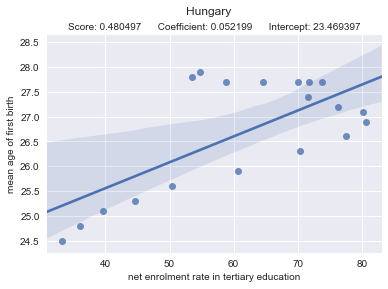

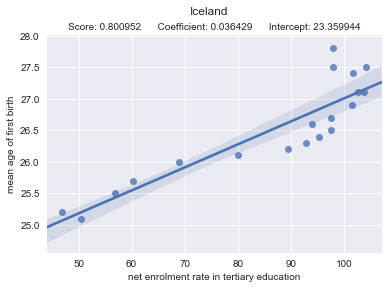

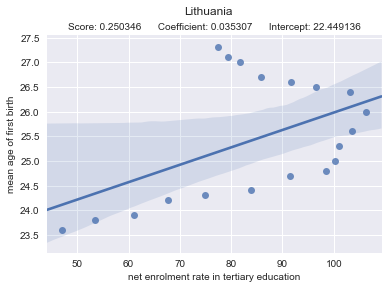

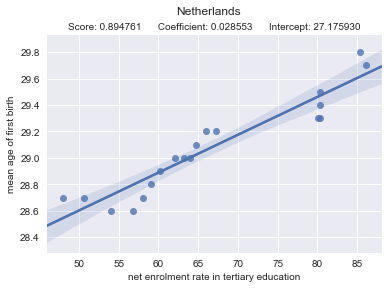

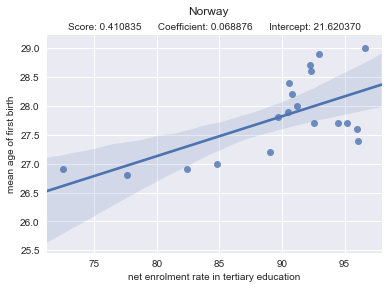

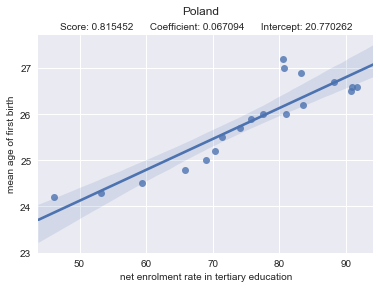

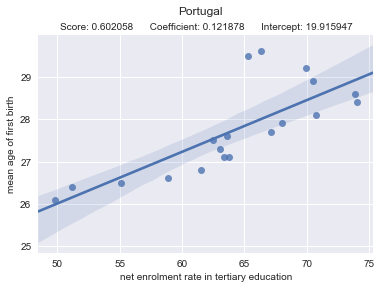

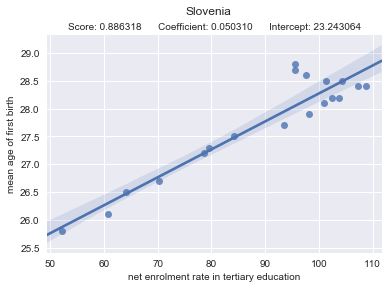

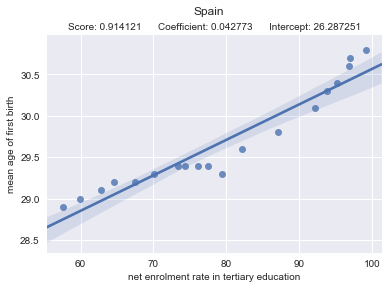

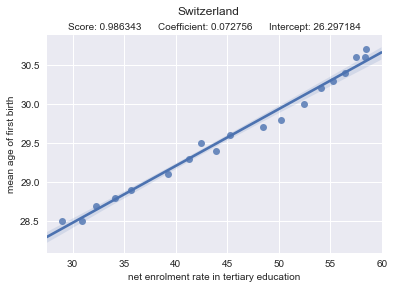

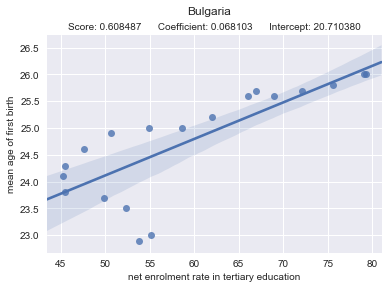

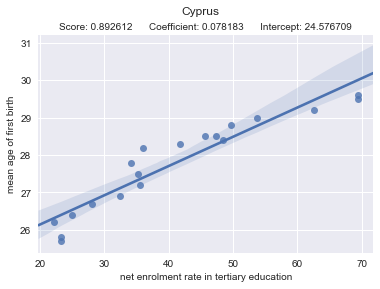

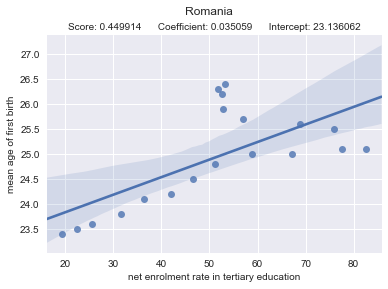

In [21]:
#correlation plot
for country in coun_select:
    if np.any(enroll_tertiary_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=enroll_tertiary_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('net enrolment rate in tertiary education', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = enroll_tertiary_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

# 2.5 Literacy rate

2.5.1 Adult literacy rate, population 15+ years

In [22]:
#read in data of adult literacy rate, population 15+ years
literacy_adult = pd.read_excel('Adult literacy rate, population 15+ years.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
literacy_adult=literacy_adult[cols[:len(cols)]]

#select the countries
literacy_adult = literacy_adult.T
new_list = []
for a in coun_select:
    new_list.append(literacy_adult [a])
literacy_adult = pd.DataFrame(new_list)
literacy_adult = literacy_adult.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if literacy_adult[country][year]=='..':
            literacy_adult[country][year]=np.nan
literacy_adult_fill = literacy_adult.fillna(method='ffill')
literacy_adult_fill = literacy_adult_fill.fillna(method='bfill')
literacy_adult_fill

Austria  Belgium  Czech Republic   Estonia  Finland    Greece  Hungary  \
1998      NaN      NaN             NaN  99.76006      NaN  94.23941      NaN   
1999      NaN      NaN             NaN  99.76006      NaN  94.23941      NaN   
2000      NaN      NaN             NaN  99.76006      NaN  94.23941      NaN   
2001      NaN      NaN             NaN  99.76006      NaN  94.23941      NaN   
2002      NaN      NaN             NaN  99.76006      NaN  94.23941      NaN   
2003      NaN      NaN             NaN  99.76006      NaN  94.23941      NaN   
2004      NaN      NaN             NaN  99.76006      NaN  94.23941      NaN   
2005      NaN      NaN             NaN  99.76006      NaN  90.76541      NaN   
2006      NaN      NaN             NaN  99.76006      NaN  90.76541      NaN   
2007      NaN      NaN             NaN  99.76006      NaN  91.81247      NaN   
2008      NaN      NaN             NaN  99.76006      NaN  91.81247      NaN   
2009      NaN      NaN             NaN  99.76006      NaN  91.84761      NaN   
2010      NaN      NaN             NaN  99.76006      NaN  91.84761      NaN   
2011      NaN      NaN             NaN  99.90948      NaN  96.22849      NaN   
2012      NaN      NaN             NaN  99.90948      NaN  96.22849      NaN   
2013      NaN      NaN             NaN  99.90948      NaN  96.22849      NaN   
2014      NaN      NaN             NaN  99.90948      NaN  96.22849      NaN   
2015      NaN      NaN             NaN  99.90948      NaN  96.22849      NaN   
2016      NaN      NaN             NaN  99.90948      NaN  96.22849      NaN   

      Iceland  Lithuania  Luxembourg    ...     Poland  Portugal  Slovenia  \
1998      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
1999      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2000      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2001      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2002      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2003      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2004      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2005      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2006      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2007      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2008      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2009      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2010      NaN   99.64794         NaN    ...        NaN  92.86077       NaN   
2011      NaN   99.83324         NaN    ...        NaN  92.86077       NaN   
2012      NaN   99.83324         NaN    ...        NaN  92.86077       NaN   
2013      NaN   99.83324         NaN    ...        NaN  92.86077       NaN   
2014      NaN   99.83324         NaN    ...        NaN  92.86077       NaN   
2015      NaN   99.83324         NaN    ...        NaN  92.86077       NaN   
2016      NaN   99.83324         NaN    ...        NaN  92.86077       NaN   

         Spain  Sweden  Switzerland  United Kingdom  Bulgaria    Cyprus  \
1998  96.23088     NaN          NaN             NaN  97.70649  95.07966   
1999  96.23088     NaN          NaN             NaN  97.70649  95.07966   
2000  96.23088     NaN          NaN             NaN  97.70649  95.07966   
2001  96.23088     NaN          NaN             NaN  97.70649  95.07966   
2002  96.23088     NaN          NaN             NaN  97.70649  95.07966   
2003  96.23088     NaN          NaN             NaN  97.70649  95.07966   
2004  96.23088     NaN          NaN             NaN  97.70649  95.07966   
2005  96.92515     NaN          NaN             NaN  97.70649  95.07966   
2006  96.92515     NaN          NaN             NaN  97.70649  95.07966   
2007  97.26032     NaN          NaN             NaN  97.70649  95.07966   
2008  96.88684     

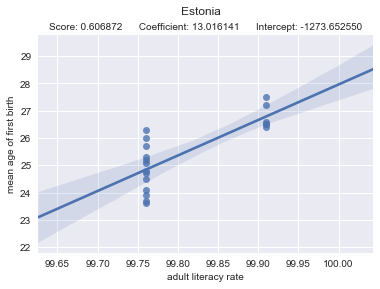

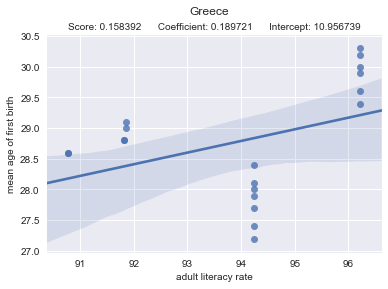

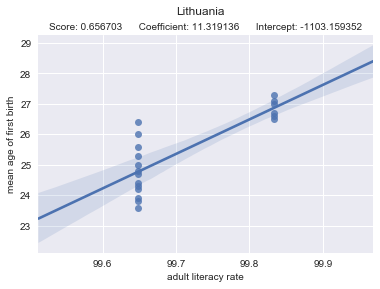

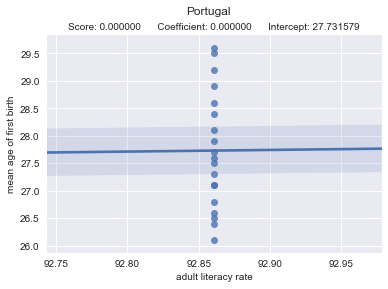

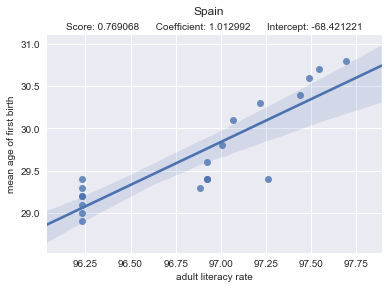

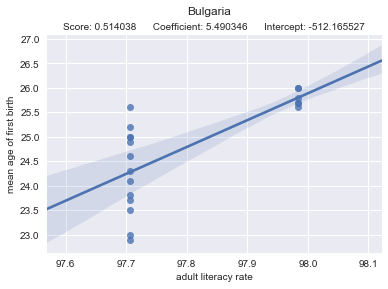

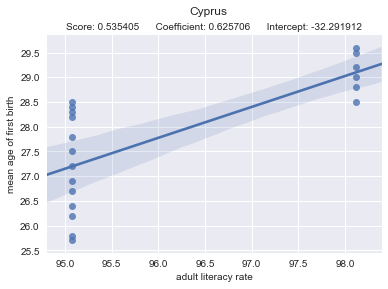

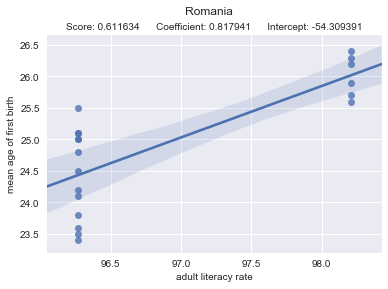

In [23]:
#correlation plot
for country in coun_select:
    if np.any(literacy_adult_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=literacy_adult_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('adult literacy rate', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y')
        x = literacy_adult_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

2.5.2 Literacy rate, population 25-64 years

In [24]:
#read in data of literacy rate, population 25-64 years
literacy_rate = pd.read_excel('Literacy rate, population 25-64 years.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
literacy_rate=literacy_rate[cols[:len(cols)]]

#select the countries
literacy_rate = literacy_rate.T
new_list = []
for a in coun_select:
    new_list.append(literacy_rate[a])
literacy_rate = pd.DataFrame(new_list)
literacy_rate = literacy_rate.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if literacy_rate[country][year]=='..':
            literacy_rate[country][year]=np.nan
literacy_rate_fill = literacy_rate.fillna(method='ffill')
literacy_rate_fill = literacy_rate_fill.fillna(method='bfill')
literacy_rate_fill

Austria  Belgium  Czech Republic   Estonia  Finland    Greece  Hungary  \
1998      NaN      NaN             NaN  99.85436      NaN  97.51657      NaN   
1999      NaN      NaN             NaN  99.85436      NaN  97.51657      NaN   
2000      NaN      NaN             NaN  99.85436      NaN  97.51657      NaN   
2001      NaN      NaN             NaN  99.85436      NaN  97.51657      NaN   
2002      NaN      NaN             NaN  99.85436      NaN  97.51657      NaN   
2003      NaN      NaN             NaN  99.85436      NaN  97.51657      NaN   
2004      NaN      NaN             NaN  99.85436      NaN  97.51657      NaN   
2005      NaN      NaN             NaN  99.85436      NaN  97.83129      NaN   
2006      NaN      NaN             NaN  99.85436      NaN  97.83129      NaN   
2007      NaN      NaN             NaN  99.85436      NaN  98.35468      NaN   
2008      NaN      NaN             NaN  99.85436      NaN  98.35468      NaN   
2009      NaN      NaN             NaN  99.85436      NaN  98.50354      NaN   
2010      NaN      NaN             NaN  99.85436      NaN  98.50354      NaN   
2011      NaN      NaN             NaN  99.89544      NaN  98.89000      NaN   
2012      NaN      NaN             NaN  99.89544      NaN  98.89000      NaN   
2013      NaN      NaN             NaN  99.89544      NaN  98.89000      NaN   
2014      NaN      NaN             NaN  99.89544      NaN  98.89000      NaN   
2015      NaN      NaN             NaN  99.89544      NaN  98.89000      NaN   
2016      NaN      NaN             NaN  99.89544      NaN  98.89000      NaN   

      Iceland  Lithuania  Luxembourg    ...     Poland  Portugal  Slovenia  \
1998      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
1999      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2000      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2001      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2002      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2003      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2004      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2005      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2006      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2007      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2008      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2009      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2010      NaN   99.75276         NaN    ...        NaN  98.35381       NaN   
2011      NaN   99.83535         NaN    ...        NaN  98.35381       NaN   
2012      NaN   99.83535         NaN    ...        NaN  98.35381       NaN   
2013      NaN   99.83535         NaN    ...        NaN  98.35381       NaN   
2014      NaN   99.83535         NaN    ...        NaN  98.35381       NaN   
2015      NaN   99.83535         NaN    ...        NaN  98.35381       NaN   
2016      NaN   99.83535         NaN    ...        NaN  98.35381       NaN   

         Spain  Sweden  Switzerland  United Kingdom  Bulgaria    Cyprus  \
1998  98.34115     NaN          NaN             NaN  98.54630  98.54776   
1999  98.34115     NaN          NaN             NaN  98.54630  98.54776   
2000  98.34115     NaN          NaN             NaN  98.54630  98.54776   
2001  98.34115     NaN          NaN             NaN  98.54630  98.54776   
2002  98.34115     NaN          NaN             NaN  98.54630  98.54776   
2003  98.34115     NaN          NaN             NaN  98.54630  98.54776   
2004  98.34115     NaN          NaN             NaN  98.54630  98.54776   
2005  98.10193     NaN          NaN             NaN  98.54630  98.54776   
2006  98.10193     NaN          NaN             NaN  98.54630  98.54776   
2007  98.80681     NaN          NaN             NaN  98.54630  98.54776   
2008  98.78200     

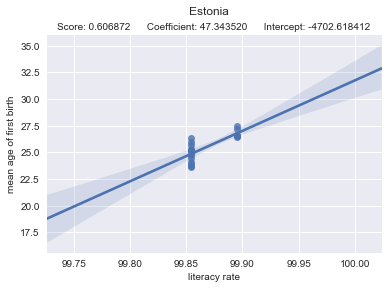

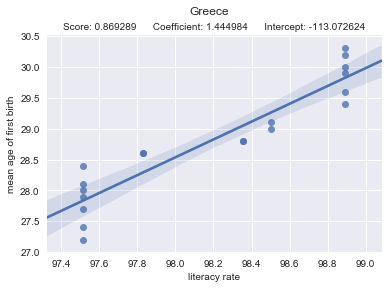

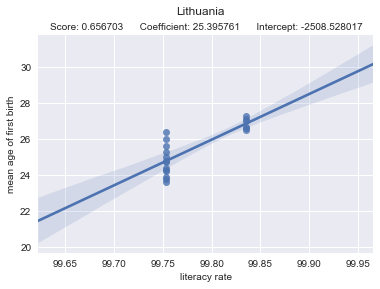

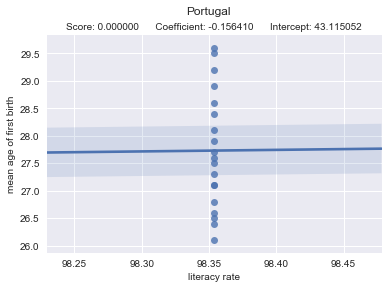

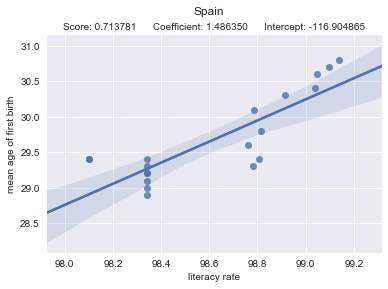

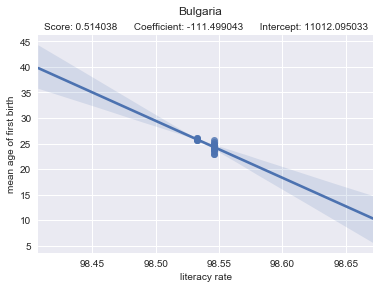

In [25]:
#correlation plot
for country in coun_select:
    if np.any(literacy_rate_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=literacy_rate_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('literacy rate', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = literacy_rate_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

# 3  Labor force participation

In [26]:
#read in data of labor force participation rate
labor_force = pd.read_excel('Labor force participation rate.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
labor_force=labor_force[cols[:len(cols)]]

#select the countries
labor_force = labor_force.T
new_list = []
for a in coun_select:
    new_list.append(labor_force[a])
labor_force = pd.DataFrame(new_list)
labor_force = labor_force.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if labor_force[country][year]=='..':
            labor_force[country][year]=np.nan
labor_force_fill = labor_force.fillna(method='ffill')
labor_force_fill = labor_force_fill.fillna(method='bfill')
labor_force_fill

Austria    Belgium  Czech Republic    Estonia    Finland     Greece  \
1998  48.813000  41.532001       51.639999  52.813999  54.987999  39.889000   
1999  48.980000  43.140999       51.987000  52.044998  56.146000  40.891998   
2000  48.944000  43.570000       51.630001  52.612000  56.188999  40.848999   
2001  48.778999  41.723000       51.235001  51.999001  56.533001  39.888000   
2002  50.153999  42.356998       50.931999  50.955002  56.862000  40.612000   
2003  50.185001  42.679001       51.048000  52.317001  56.528999  41.265999   
2004  49.359001  43.957001       50.638000  53.215000  56.313000  42.641998   
2005  50.667000  45.487000       50.772999  53.498001  56.622002  42.712002   
2006  51.242001  45.622002       50.623001  54.728001  57.084999  43.113998   
2007  52.116001  46.409000       49.888000  54.150002  57.471001  43.097000   
2008  52.675999  46.730999       49.348999  54.888000  57.438999  43.138000   
2009  53.373001  46.747002       49.508999  54.738998  57.021000  44.175999   
2010  53.507000  47.491001       49.231998  55.025002  56.025002  44.750000   
2011  53.840000  46.806000       49.431999  55.560001  55.811001  44.568001   
2012  54.335999  46.889999       50.066002  55.361000  55.944000  44.875000   
2013  54.597000  47.595001       50.987999  55.338001  55.500000  44.722000   
2014  54.561001  48.009998       50.967999  54.591000  55.506001  44.851002   
2015  54.535999  48.023998       51.422001  55.990002  55.521000  45.473999   
2016  54.946999  47.765999       52.066002  56.473000  54.953999  45.702000   

        Hungary    Iceland  Lithuania  Luxembourg    ...         Poland  \
1998  39.966999  70.128998  53.361000   37.708000    ...      49.116001   
1999  40.868000  72.209000  55.043999   39.708000    ...      48.659000   
2000  41.112000  73.737000  54.792999   41.382000    ...      49.581001   
2001  40.863998  72.616997  53.147999   41.141998    ...      49.977001   
2002  41.125999  71.968002  52.105999   42.381001    ...      48.797001   
2003  42.118000  71.794998  54.881001   42.525002    ...      48.217999   
2004  41.987000  71.440002  51.416000   44.345001    ...      47.480000   
2005  42.917999  70.875999  50.602001   45.368000    ...      47.787998   
2006  43.198002  71.505997  50.133999   46.716000    ...      46.701000   
2007  42.881001  71.540001  50.175999   46.819000    ...      46.437000   
2008  42.682999  70.912003  50.539001   46.953999    ...      46.800999   
2009  42.791000  70.264000  52.063000   48.766998    ...      47.424000   
2010  43.777000  70.634003  52.546001   48.827999    ...      48.271999   
2011  43.902000  70.214996  53.106998   49.408001    ...      48.372002   
2012  44.800999  70.838997  53.626999   50.970001    ...      48.764000   
2013  44.908001  71.481003  53.256001   51.109001    ...      48.778000   
2014  46.280998  72.147003  54.077000   51.992001    ...      49.164001   
2015  47.252998  73.098000  54.546001   53.558998    ...      48.995998   
2016  47.962002  73.171997  55.859001   52.240002    ...      49.020000   

       Portugal   Slovenia      Spain     Sweden  Switzerland  United Kingdom  \
1998  51.787998  53.071999  38.375999  58.141998    58.132999       52.695000   
1999  52.123001  51.785999  39.078999  58.823002    58.320000       53.216000   
2000  52.631001  51.244999  40.582001  58.346001    57.772999       53.554001   
2001  53.400002  50.937000  39.460999  58.479000    58.895000       53.374001   
2002  53.985001  51.674999  41.914001  58.591000    59.359001       53.949001   
2003  54.672001  50.276001  43.365002  58.716000    59.554001       53.908001   
2004  54.236000  52.807999  44.724998  58.400002    59.237000       54.307999   
2005  55.284000  52.849998  46.098999  59.581001    59.459000       54.713001   
2006  55.573002  53.257999  47.449001  59.216000    59.890999       55.127998   
2007  56.005001  53.487000  48.353001  59.675999    60.101002       54.945999   
2008  55.868000  53.627998  49.6689

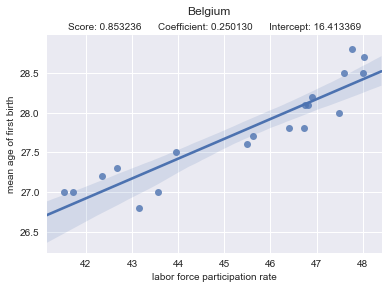

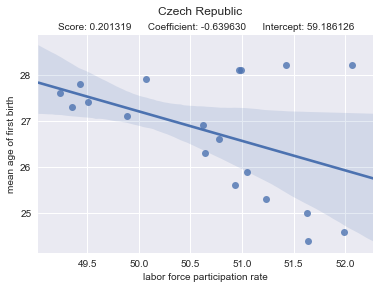

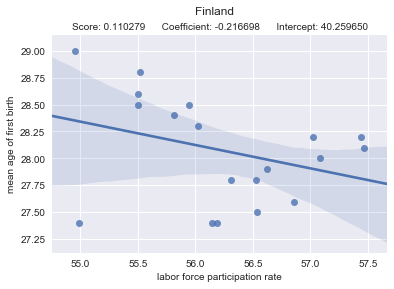

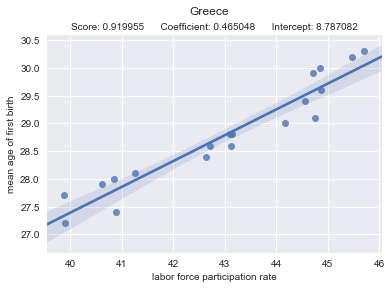

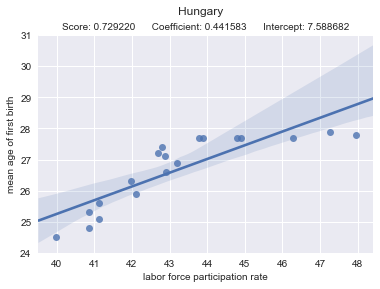

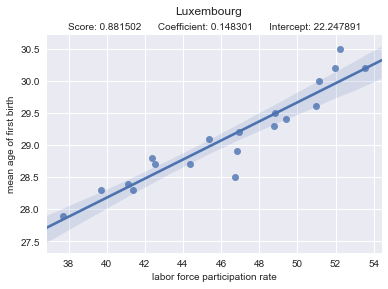

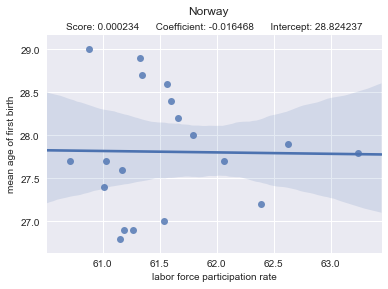

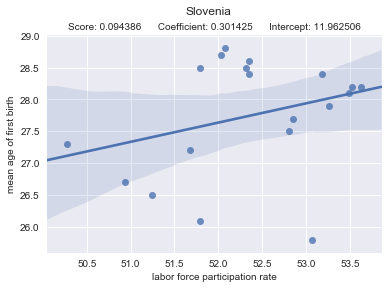

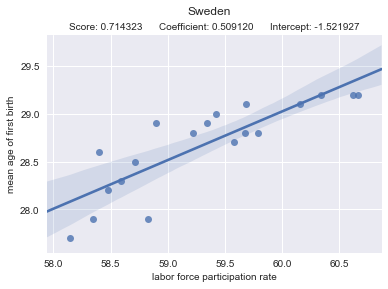

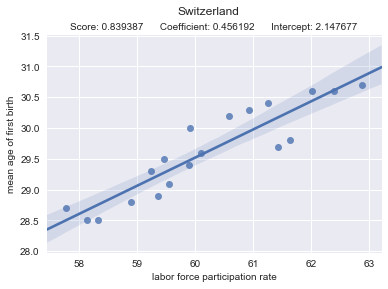

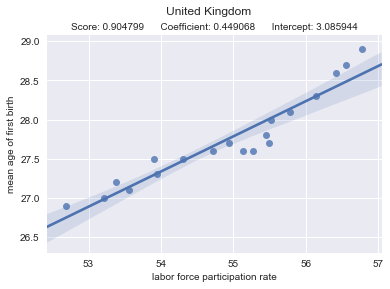

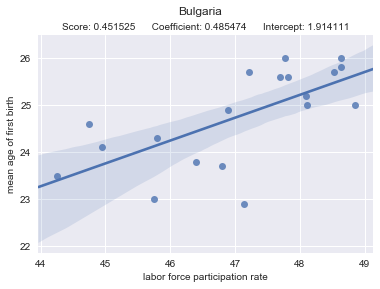

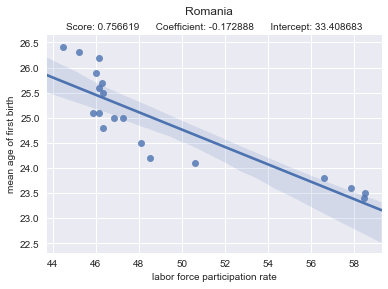

In [27]:
#correlation plot
for country in coun_select:
    if np.any(labor_force_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=labor_force_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('labor force participation rate', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = labor_force_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

# 4 Economic Uncertainty

# 4.1 Labor market

4.1.1 Total unemployment rate

In [28]:
#read in data of unemployment, total
unemploy_total = pd.read_excel('Unemployment, total.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
unemploy_total=unemploy_total[cols[:len(cols)]]

#select the countries
unemploy_total = unemploy_total.T
new_list = []
for a in coun_select:
    new_list.append(unemploy_total[a])
unemploy_total = pd.DataFrame(new_list)
unemploy_total = unemploy_total.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if unemploy_total[country][year]=='..':
            unemploy_total[country][year]=np.nan
unemploy_total_fill = unemploy_total.fillna(method='ffill')
unemploy_total_fill = unemploy_total_fill.fillna(method='bfill')
unemploy_total_fill

Austria  Belgium  Czech Republic    Estonia  Finland     Greece  \
1998     5.52     9.32            5.90   9.510000    13.21  10.840000   
1999     4.70     8.65            8.49  11.570000    11.69  11.850000   
2000     4.69     6.59            8.76  13.360000    11.13  11.250000   
2001     4.01     6.18            7.99  13.130000    10.29  10.460000   
2002     4.85     6.91            7.02  10.030000    10.42   9.970000   
2003     4.78     7.68            7.54  11.290000    10.47   9.410000   
2004     5.83     7.36            8.21  10.250000    10.36  10.310000   
2005     5.63     8.44            7.93   8.030000     8.38   9.990000   
2006     5.24     8.25            7.15   5.910000     7.72   9.010000   
2007     4.86     7.46            5.32   4.590000     6.85   8.400000   
2008     4.13     6.98            4.39   5.450000     6.37   7.760000   
2009     5.30     7.91            6.66  13.550000     8.25   9.620000   
2010     4.82     8.29            7.28  16.709999     8.39  12.710000   
2011     4.56     7.14            6.71  12.330000     7.78  17.860001   
2012     4.87     7.54            6.98  10.020000     7.69  24.440001   
2013     5.33     8.43            6.95   8.630000     8.19  27.469999   
2014     5.62     8.52            6.11   7.350000     8.66  26.490000   
2015     5.72     8.48            5.05   6.190000     9.38  24.900000   
2016     6.01     7.83            3.95   6.760000     8.82  23.540001   

      Hungary  Iceland  Lithuania  Luxembourg   ...        Poland  Portugal  \
1998     8.93     3.07  13.710000        2.76   ...      9.940000      4.65   
1999     6.93     2.18  13.390000        2.39   ...     12.290000      4.60   
2000     6.56     1.94  15.930000        2.35   ...     16.309999      3.82   
2001     5.67     1.87  16.840000        1.80   ...     18.370001      3.83   
2002     5.61     2.99  13.010000        2.62   ...     19.889999      4.50   
2003     5.79     4.00  12.870000        3.68   ...     19.370001      6.13   
2004     5.83     4.03  10.680000        5.11   ...     19.070000      6.32   
2005     7.19     2.55   8.320000        4.49   ...     17.750000      7.58   
2006     7.49     2.83   5.780000        4.73   ...     13.840000      7.65   
2007     7.41     2.25   4.250000        4.07   ...      9.600000      7.96   
2008     7.82     2.95   5.830000        5.06   ...      7.120000      7.55   
2009    10.03     7.22  13.790000        5.12   ...      8.170000      9.43   
2010    11.17     7.56  17.809999        4.36   ...      9.640000     10.77   
2011    11.03     7.03  15.390000        4.90   ...      9.630000     12.68   
2012    11.00     6.00  13.360000        5.14   ...     10.090000     15.53   
2013    10.18     5.38  11.770000        5.85   ...     10.330000     16.18   
2014     7.73     4.90  10.700000        5.85   ...      8.990000     13.89   
2015     6.81     3.98   9.120000        6.67   ...      7.500000     12.44   
2016     5.11     2.98   7.860000        6.29   ...      6.160000     11.07   

      Slovenia      Spain  Sweden  Switzerland  United Kingdom   Bulgaria  \
1998      7.39  18.670000    8.94         3.60            6.20  12.200000   
1999      7.32  15.480000    7.61         3.15            6.04  14.100000   
2000      6.92  13.790000    5.47         2.67            5.56  16.219999   
2001      5.68  10.350000    3.98         2.49            4.70  19.920000   
2002      5.92  11.150000    3.99         2.92            5.04  18.110001   
2003      6.48  11.280000    4.88         4.12            4.81  13.730000   
2004      6.01  11.090000    5.52         4.32            4.59  12.040000   
2005      6.51   9.150000    7.67         4.44            4.75  10.080000   
2006      5.95   8.450000    7.05         4.00            5.35   8.950000   
2007      4.82   8.230000    6.12         3.65            5.26   6.880000   
2008      4.37  11.250000    6.18         3.35            5.62   5.610000   
2009      5.86  17.860001    8.30       

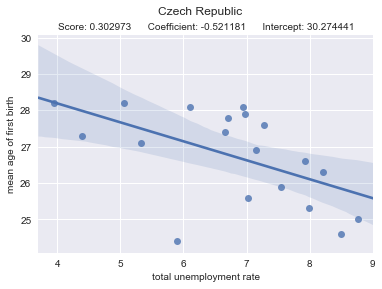

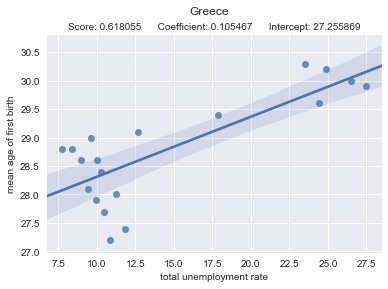

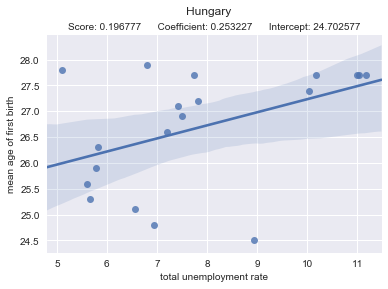

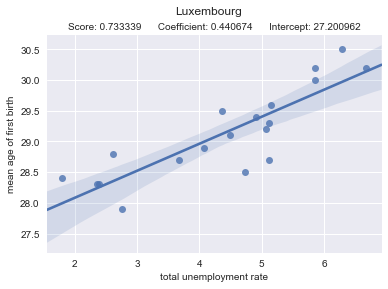

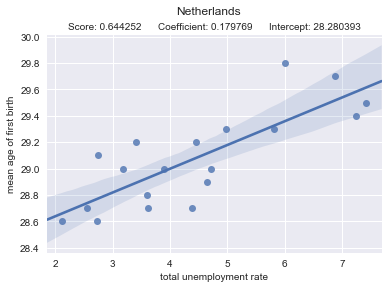

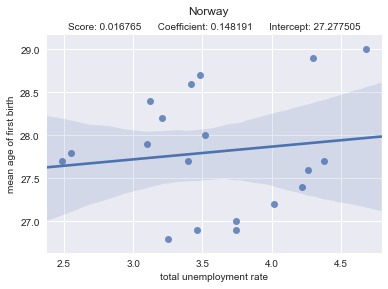

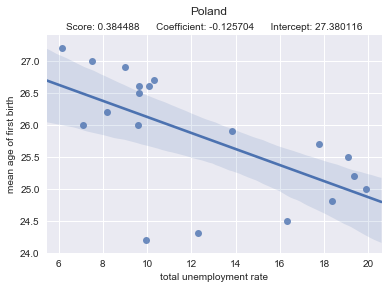

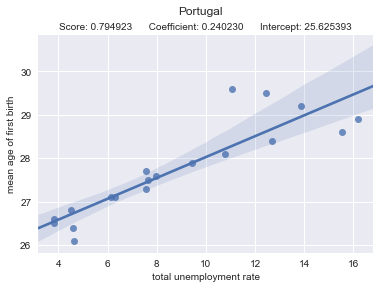

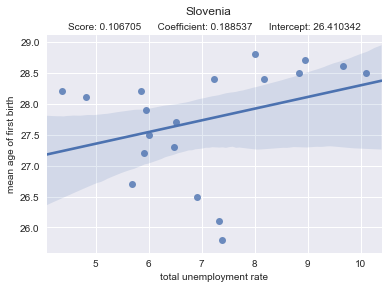

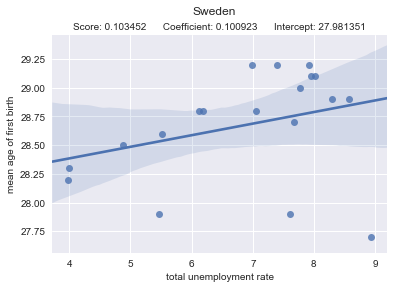

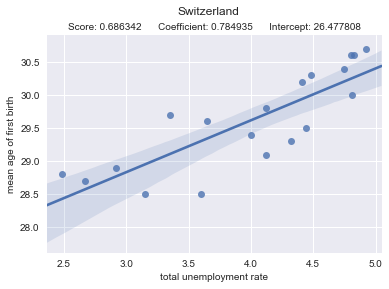

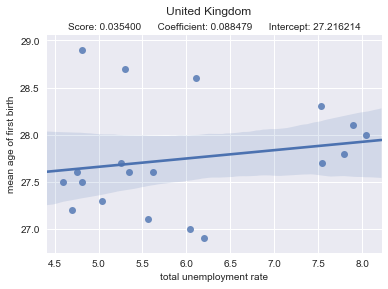

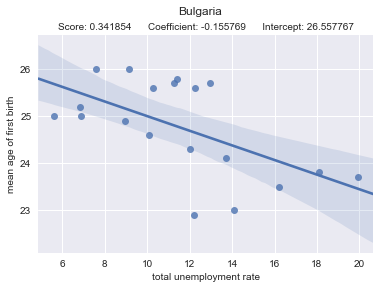

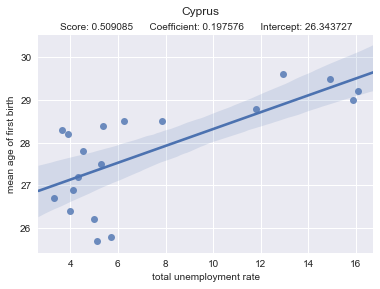

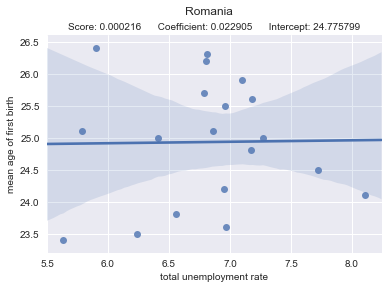

In [29]:
#correlation plot
for country in coun_select:
    if np.any(unemploy_total_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=unemploy_total_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('total unemployment rate', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = unemploy_total_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

4.1.2 Female unemployment rate

In [30]:
#read in data of unemployment, female
unemploy_female = pd.read_excel('Unemployment, female.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
unemploy_female=unemploy_female[cols[:len(cols)]]

#select the countries
unemploy_female = unemploy_female.T
new_list = []
for a in coun_select:
    new_list.append(unemploy_female[a])
unemploy_female = pd.DataFrame(new_list)
unemploy_female = unemploy_female.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if unemploy_female[country][year]=='..':
            unemploy_female[country][year]=np.nan
unemploy_female_fill = unemploy_female.fillna(method='ffill')
unemploy_female_fill = unemploy_female_fill.fillna(method='bfill')
unemploy_female_fill

Austria  Belgium  Czech Republic  Estonia  Finland     Greece  Hungary  \
1998    5.588   11.701           7.554    8.503   13.578  16.813000    8.094   
1999    4.762   10.216          10.127   10.131   12.443  18.327000    6.220   
2000    4.594    8.284          10.535   11.606   11.990  17.173000    5.785   
2001    4.134    6.924           9.612   13.233   10.761  16.027000    4.873   
2002    4.527    7.803           8.559    8.682   10.165  15.435000    5.076   
2003    4.340    7.999           9.641   10.381    9.937  14.547000    5.385   
2004    5.885    8.279           9.651    8.826   10.574  16.059999    5.857   
2005    5.860    9.511           9.796    6.903    8.608  15.504000    7.429   
2006    5.600    9.317           8.849    5.585    8.083  13.821000    7.910   
2007    5.302    8.450           6.738    3.757    7.186  12.964000    7.738   
2008    4.412    7.605           5.605    5.132    6.693  11.547000    8.006   
2009    5.084    8.114           7.723   10.296    7.570  13.323000    9.736   
2010    4.631    8.515           8.460   14.093    7.637  16.375999   10.658   
2011    4.576    7.178           7.891   11.579    7.097  21.556000   10.981   
2012    4.795    7.409           8.212    9.097    7.051  28.264999   10.607   
2013    5.287    8.174           8.287    8.155    7.516  31.410000   10.142   
2014    5.380    7.937           7.394    6.808    7.946  30.224001    7.914   
2015    5.304    7.768           6.078    6.134    8.842  28.916000    7.038   
2016    5.536    7.560           4.667    6.065    8.581  28.167999    5.105   

      Iceland  Lithuania  Luxembourg   ...        Poland  Portugal  Slovenia  \
1998    3.806     11.861       4.160   ...     11.828000     5.693     7.470   
1999    2.789     12.064       3.336   ...     13.172000     5.083     7.465   
2000    2.631     13.606       3.147   ...     18.327999     4.745     7.066   
2001    2.231     14.091       2.166   ...     20.028000     4.950     6.011   
2002    2.650     12.785       3.637   ...     20.676001     5.319     6.265   
2003    3.973     13.197       4.715   ...     19.934999     7.259     7.020   
2004    2.754     11.062       7.089   ...     19.768999     7.191     6.397   
2005    2.492      8.529       5.830   ...     19.146999     8.640     7.034   
2006    3.053      5.609       6.269   ...     14.925000     8.915     7.186   
2007    2.266      4.331       4.729   ...     10.345000     9.489     5.831   
2008    2.590      5.633       6.026   ...      7.961000     8.753     4.817   
2009    5.689     10.531       6.123   ...      8.667000    10.088     5.806   
2010    6.729     14.517       5.096   ...     10.025000    11.858     7.023   
2011    6.205     12.910       6.256   ...     10.394000    13.046     8.175   
2012    5.659     11.568       5.909   ...     10.907000    15.504     9.369   
2013    5.081     10.483       6.388   ...     11.110000    16.365    10.908   
2014    4.789      9.225       5.766   ...      9.588000    14.326    10.550   
2015    4.054      8.159       7.351   ...      7.708000    12.742    10.034   
2016    3.049      6.650       6.631   ...      6.226000    11.172     8.588   

          Spain  Sweden  Switzerland  United Kingdom  Bulgaria  Cyprus  \
1998  26.639999   8.037        4.141           5.357    11.775   6.945   
1999  22.861000   6.860        3.573           5.146    14.154   7.823   
2000  20.375000   5.004        3.133           4.859    15.814   7.480   
2001  15.062000   3.613        3.460           4.114    18.858   5.776   
2002  16.069000   3.572        3.095           4.359    17.357   4.229   
2003  15.698000   4.389        4.492           4.062    13.188   4.610   
2004  15.046000   5.096        4.768           4.184    11.622   5.448   
2005  12.000000   7.554        5.092           4.287     9.832   6.543   
2006  11.347000   7.234        4.711           4.947     9.304   5.459   
2007  10.702000   6.419        4.509           4.954     7.294  

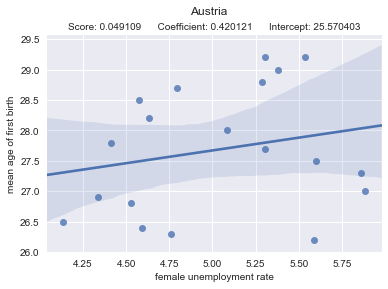

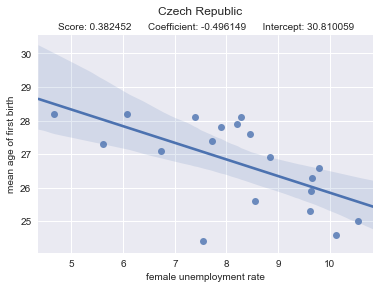

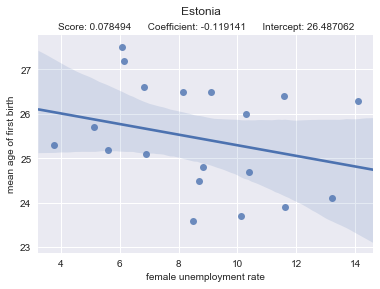

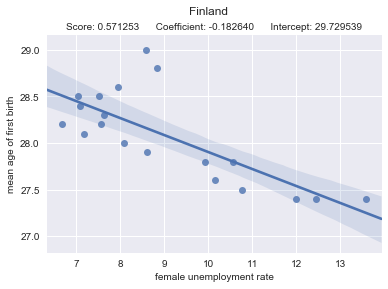

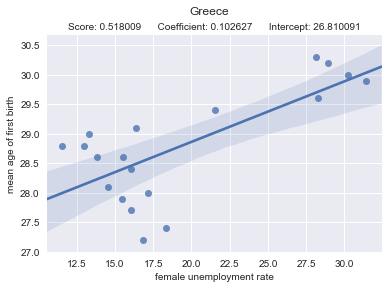

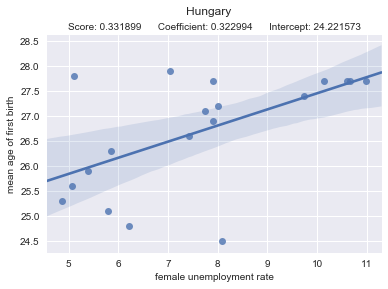

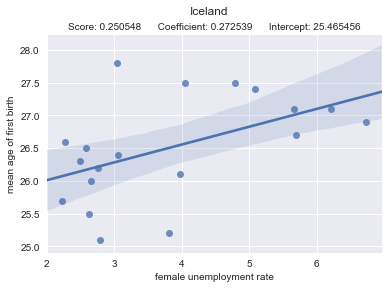

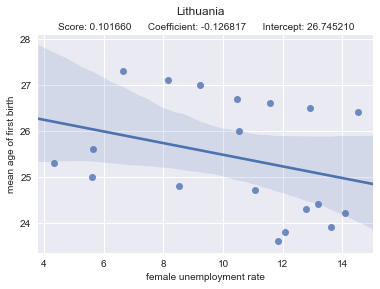

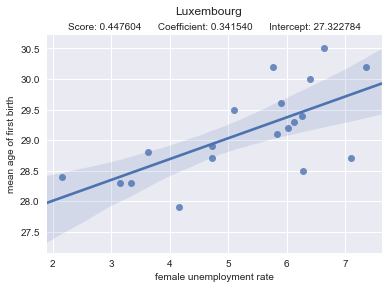

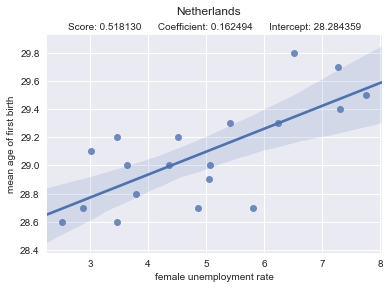

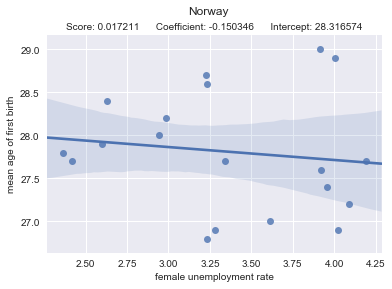

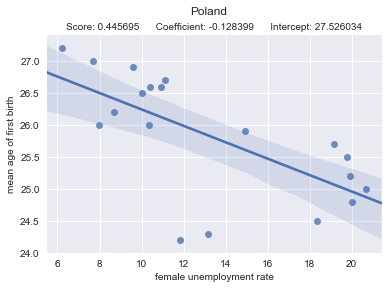

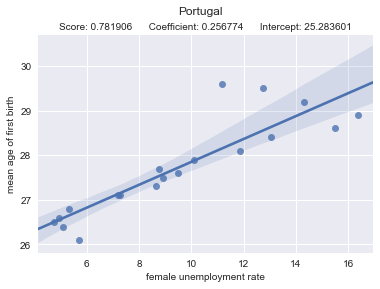

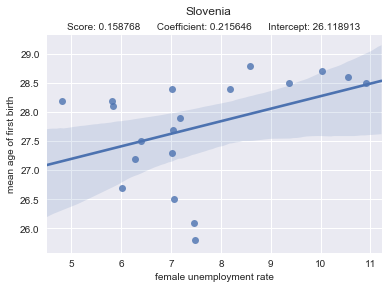

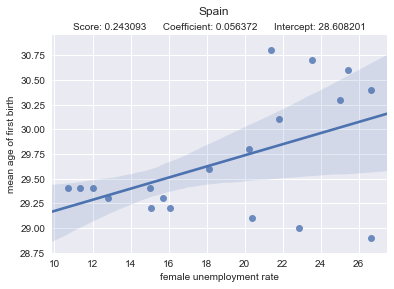

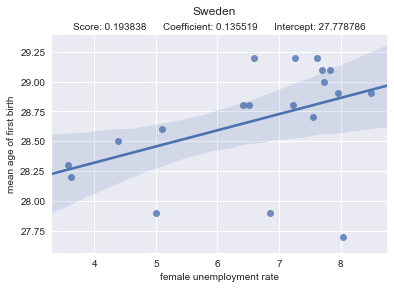

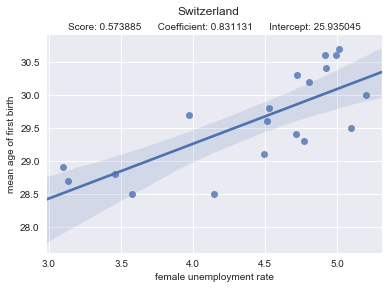

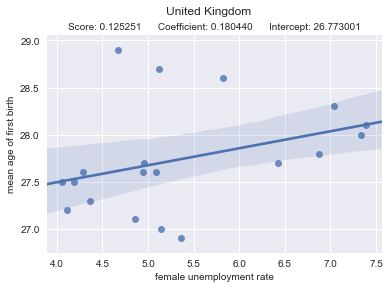

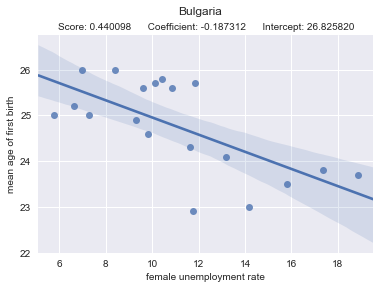

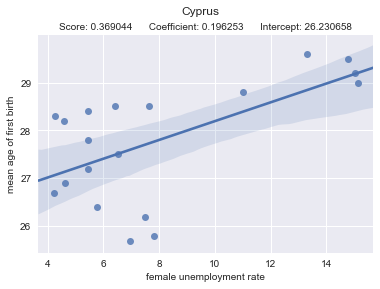

In [31]:
#correlation plot
for country in coun_select:
    if np.any(unemploy_female_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=unemploy_female_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('female unemployment rate', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = unemploy_female_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

4.1.3 Youth female unemployment rate

In [32]:
#read in data of unemployment, youth female
unemploy_young_female = pd.read_excel('Unemployment, youth female.xlsx', index_col=0, header=0).fillna(0)

#select the years of data
unemploy_young_female=unemploy_young_female[cols[:len(cols)]]

#select the countries
unemploy_young_female = unemploy_young_female.T
new_list = []
for a in coun_select:
    new_list.append(unemploy_young_female[a])
unemploy_young_female = pd.DataFrame(new_list)
unemploy_young_female = unemploy_young_female.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        if unemploy_young_female[country][year]=='..':
            unemploy_young_female[country][year]=np.nan
unemploy_young_female_fill = unemploy_young_female.fillna(method='ffill')
unemploy_young_female_fill = unemploy_young_female_fill.fillna(method='bfill')
unemploy_young_female_fill

Austria    Belgium  Czech Republic    Estonia    Finland     Greece  \
1998    7.603  23.080999       12.807000  11.709000  35.382000  39.563000   
1999    6.387  22.490999       17.000000  21.837999  31.245001  41.314999   
2000    5.569  18.247999       16.459000  19.608999  30.889000  38.214001   
2001    5.791  16.731001       16.165001  31.250999  28.992001  36.560001   
2002    6.540  15.234000       14.977000  24.768999  29.193001  34.687000   
2003    6.742  17.541000       17.495001  31.889000  29.288000  35.060001   
2004   11.853  19.552999       17.922001  23.893000  28.183001  35.348000   
2005   10.300  22.063000       19.091999  13.795000  19.520000  34.363998   
2006    9.728  22.527000       18.730000  15.138000  18.474001  34.238998   
2007    9.626  20.823999       10.996000   7.134000  16.614000  31.615999   
2008    8.582  18.681999        9.925000  11.271000  15.814000  28.221001   
2009   10.077  22.461000       16.711000  21.752001  18.895000  33.292000   
2010    9.367  22.377001       18.509001  29.451000  18.938000  40.595001   
2011    9.076  18.761999       17.929001  20.591999  18.316000  51.860001   
2012    9.238  18.905001       19.025000  18.474001  17.947001  63.370998   
2013    9.987  22.507999       19.466000  19.833000  16.966000  63.911999   
2014    9.913  22.332001       17.101000   9.951000  18.225000  58.393002   
2015   10.006  20.049000       14.448000  12.204000  19.582001  55.029999   
2016   10.222  18.122000       11.393000  10.555000  18.483999  50.740002   

        Hungary  Iceland  Lithuania  Luxembourg    ...         Poland  \
1998  12.662000    7.505  18.919001    7.052000    ...      23.502001   
1999  10.669000    4.978  20.999001    7.386000    ...      31.434000   
2000  10.407000    3.765  27.284000    7.323000    ...      37.070000   
2001   9.481000    4.323  24.611000    5.454000    ...      40.307999   
2002  10.181000    3.006  21.563000    8.998000    ...      41.986000   
2003  12.016000   11.734  32.887001   12.219000    ...      42.516998   
2004  14.146000    7.176  16.521000   22.350000    ...      41.400002   
2005  19.061001    5.864  15.437000   16.252001    ...      38.175999   
2006  19.847000    7.319   9.960000   15.136000    ...      31.548000   
2007  18.962000    5.921  10.472000   17.261000    ...      23.775999   
2008  20.468000    7.084  13.923000   23.664000    ...      19.858999   
2009  24.577999   11.668  22.400000   17.591999    ...      21.165001   
2010  24.716000   13.787  31.584000   10.148000    ...      25.410000   
2011  24.671000   10.531  29.347000   20.722000    ...      28.733000   
2012  27.080000   12.025  22.681000   18.481001    ...      29.854000   
2013  27.860001    7.671  20.377001   10.882000    ...      29.962999   
2014  20.875999    6.537  18.732000   17.739000    ...      25.381001   
2015  15.903000    6.634  16.639000   15.592000    ...      20.863001   
2016  12.829000    6.172  12.584000   17.916000    ...      17.922001   

       Portugal   Slovenia      Spain     Sweden  Switzerland  United Kingdom  \
1998  10.653000  18.465000  43.199001  16.728001        7.598       10.651000   
1999  11.007000  20.180000  37.054001  13.183000        5.778       10.353000   
2000  11.757000  18.367001  32.213001  10.900000        4.122       10.407000   
2001  11.997000  16.673000  26.423000  14.353000        5.485        8.696000   
2002  12.083000  16.573999  27.746000  16.337000        3.923        8.772000   
2003  16.718000  18.466000  26.483999  17.007000        8.713        9.462000   
2004  15.904000  17.708000  26.483999  21.950001        7.360        9.742000   
2005  19.132999  17.721001  23.492001  21.188000        9.079       11.012000   
2006  18.478001  16.636000  21.582001  21.808001        7.455       12.060000   
2007  20.259001  11.128000  21.833000  19.416000        7.364       12.582000   
2008  20.257000  11.214000  25.653000  20.341000        7.376       12.826000   
2009  21.649000  13.347000  36.3

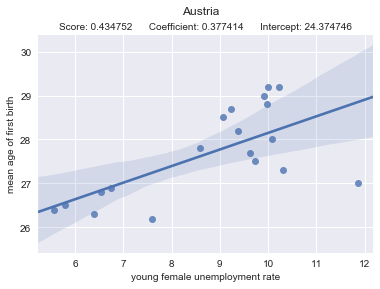

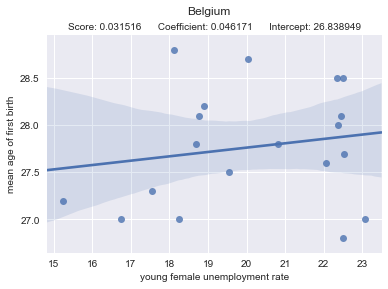

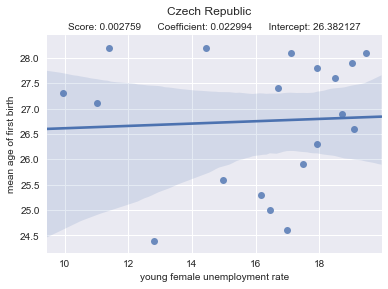

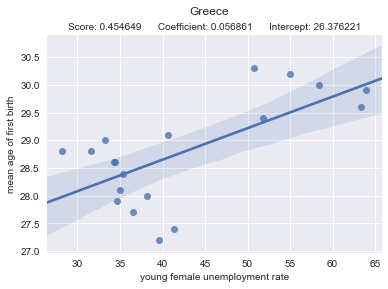

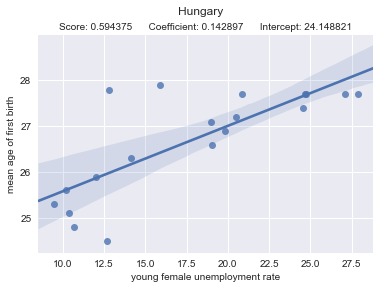

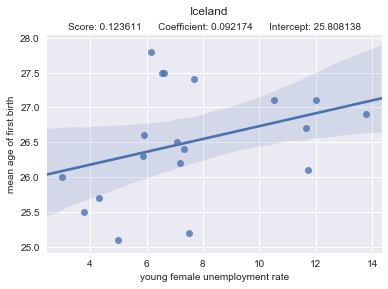

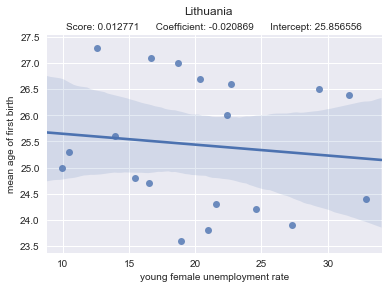

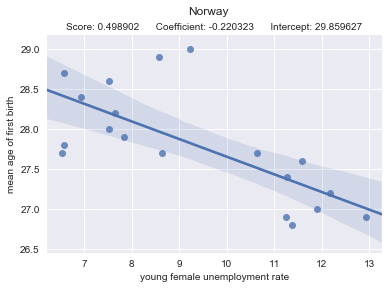

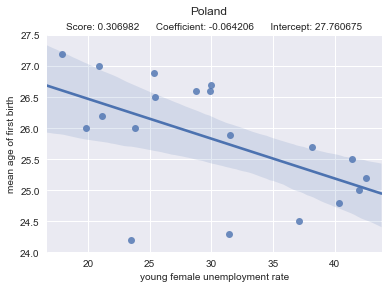

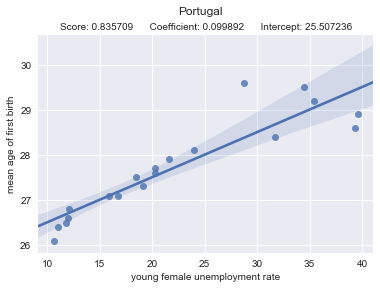

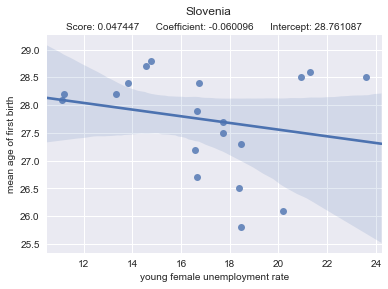

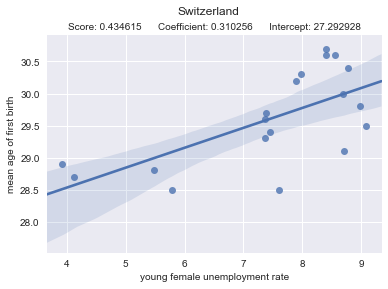

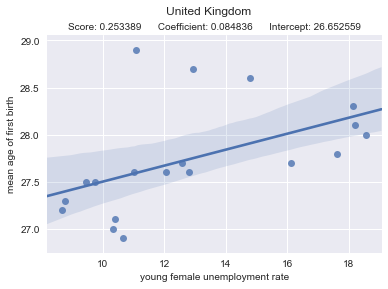

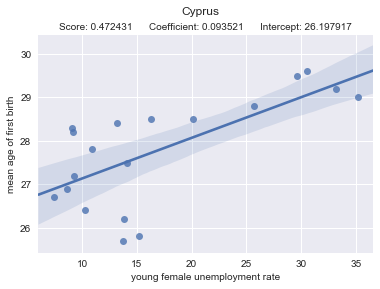

In [33]:
#correlation plot
for country in coun_select:
    if np.any(unemploy_young_female_fill[country].isnull())!= True:
        plt.figure()
        try:
            sns.regplot(x=unemploy_young_female_fill[country], y=mean_age_first_birth[country])
        except:
            TypeError
        plt.xlabel('young female unemployment rate', fontsize = 10)
        plt.ylabel('mean age of first birth', fontsize = 10)
        plt.ticklabel_format(style='plain', axis='y') 
        x = unemploy_young_female_fill[country].tolist()
        x = np.reshape(x,newshape=(19,1))
        y = mean_age_first_birth[country].tolist()
        y = np.reshape(y,newshape=(19,1))
        lr = LinearRegression()
        lr.fit(x,y)
        plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
        plt.suptitle(country,fontsize=12)
        plt.show()
        
    else:
        pass

# 4.2 Housing market

In [34]:
#read in data of real house price indices
house_price = pd.read_excel('Real house price indices.xlsx', index_col=0, header=4).fillna(0)
house_price
#select the years of data
house_price=house_price[cols[:len(cols)]]

#select the countries
house_price = house_price.T
new_list = []
for a in coun_select:
        try:
            new_list.append(house_price[a])
        except KeyError:
            pass
house_price = pd.DataFrame(new_list)
house_price = house_price.T

#fill the NaNs in the dataframe with the value before or after the NaN row
for country in coun_select:
    for year in cols:
        try:
            if house_price[country][year]=='..':
                house_price[country][year]=np.nan
        except KeyError:
            pass
house_price_fill = house_price.fillna(method='ffill')
house_price_fill = house_price_fill.fillna(method='bfill')
house_price_fill

Austria     Belgium  Czech Republic     Estonia     Finland  \
1998   78.203169   60.583430      107.843996   85.896400   71.868887   
1999   78.203169   64.486694      107.843996   85.896400   75.855015   
2000   78.203169   65.868364      107.843996   85.896400   76.453189   
2001   77.063731   67.669387      107.843996   85.896400   73.428220   
2002   76.655368   71.018255      107.843996   85.896400   76.576059   
2003   75.707066   74.735645      107.843996   85.896400   80.633209   
2004   72.967341   79.309411      107.843996   85.896400   86.931246   
2005   74.809314   86.241819      107.843996   85.896400   92.867877   
2006   76.308454   91.807001      107.843996  121.259400   98.043121   
2007   77.943198   96.186777      107.843996  136.004336  101.888859   
2008   77.153382   97.332855      107.843996  113.574242   99.391136   
2009   79.789485   97.269594      102.802049   71.474689   98.982610   
2010   85.806896   98.605459      100.535156   72.678146  103.743024   
2011   88.435413   99.576369       98.844211   74.723720  103.696925   
2012   92.657901   99.795785       95.293222   77.204906  103.284309   
2013   95.442416  100.127434       94.518468   82.944539  101.989012   
2014   96.832280   99.074255       96.261775   93.483521  100.272114   
2015  100.000000  100.000000      100.000000  100.000000  100.000000   
2016  107.105047  100.880482      106.557363  103.630507   99.751679   

          Greece     Hungary     Iceland   Lithuania  Luxembourg  Netherlands  \
1998   98.276718  127.377114  109.520118  125.756526   82.908482    78.664054   
1999  102.552495  127.377114  109.520118  125.756526   82.908482    89.884818   
2000  113.525518  127.377114  109.520118  125.756526   82.908482   103.168192   
2001  127.854506  127.377114  109.520118  125.756526   82.908482   111.045913   
2002  142.425666  127.377114  109.520118  125.756526   82.908482   114.306556   
2003  146.442315  127.377114  109.520118  125.756526   82.908482   115.733413   
2004  145.023608  127.377114  109.520118  125.756526   82.908482   119.067638   
2005  156.170052  127.377114  109.520118  125.756526   82.908482   121.399908   
2006  170.924169  127.377114  119.320414  125.756526   82.908482   123.226157   
2007  175.175930  127.377114  124.532911  150.147381   82.908482   126.594742   
2008  170.328724  123.414877  115.615400  147.554812   83.088478   126.737950   
2009  161.468453  112.354637   90.335765   99.037152   82.545458   122.930061   
2010  148.968087  105.738170   84.251579   90.578807   85.967681   118.855593   
2011  137.683419   98.456503   84.981713   92.755320   86.514204   114.084625   
2012  120.946848   89.304401   85.802725   89.767145   88.360826   105.075067   
2013  109.724988   85.407810   87.505018   89.954471   91.261471    96.751870   
2014  103.570082   88.218130   92.678359   95.617946   94.801025    96.688415   
2015  100.000000  100.000000  100.000000  100.000000  100.000000   100.000000   
2016   98.358992  113.558845  109.155151  104.462476  105.609474   104.414904   

          Norway      Poland    Portugal    Slovenia       Spain      Sweden  \
1998   43.586995  113.529399  124.491358  137.180826   73.778015   37.097420   
1999   47.477297  113.529399  132.363805  137.180826   77.288279   39.987071   
2000   53.503463  113.529399  137.517334  137.180826   79.873612   44.037231   
2001   55.965599  113.529399  139.695821  137.180826   84.493579   46.525130   
2002   57.961870  113.529399  135.840760  137.180826   96.152207   48.765328   
2003   57.293142  113.529399  132.513922  137.180826  111.812732   51.175242   
2004   62.381693  113.529399  130.329440  137.180826  127.706685   55.505793   
2005   66.767746  113.529399  128.354072  137.180826  141.567329   59.847027   
2006   74.543830  113.529399  126.601611  137.180826  155.212068   66.502445   
2007   82.869917  113.529399  123.058273  137.180826  164.996906   73.779856   
2008   79.255904  113.529399  112.149175  139.011150  157.061629   

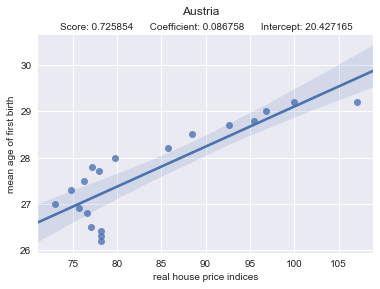

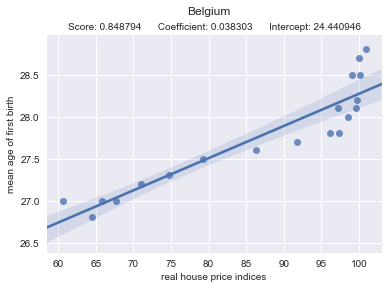

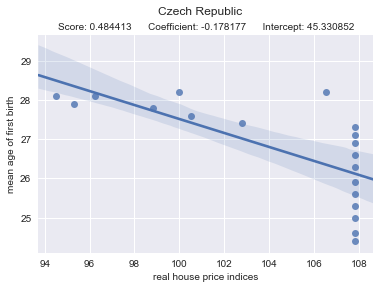

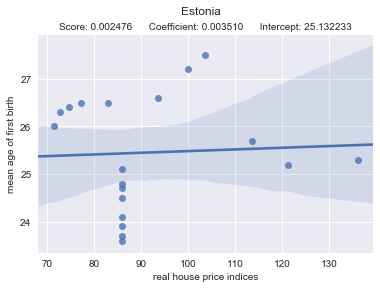

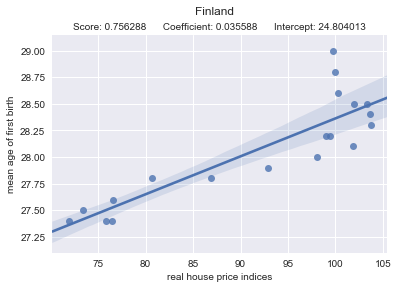

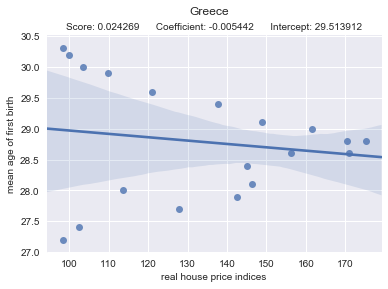

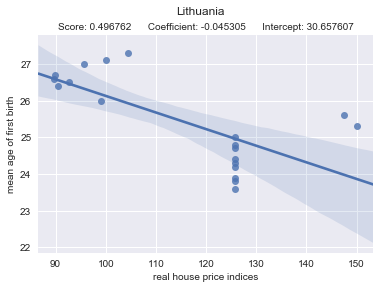

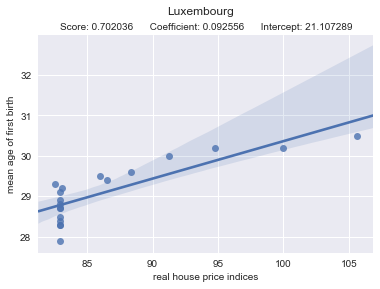

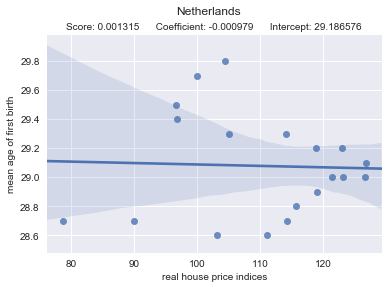

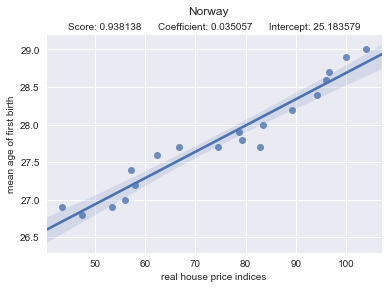

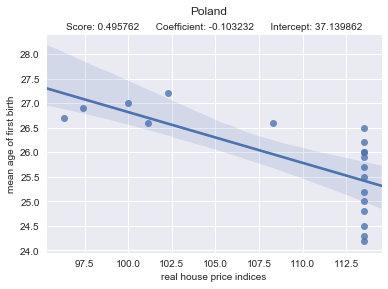

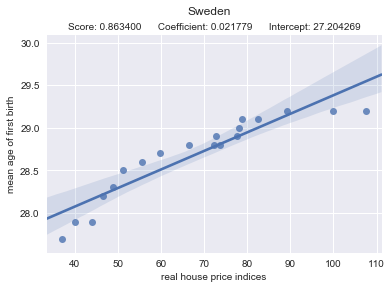

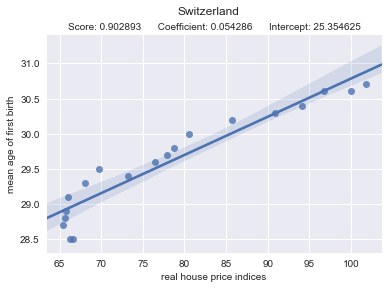

In [39]:
#correlation plot
for country in coun_select:
        try:
            if np.any(house_price_fill[country].isnull())!= True:
                plt.figure()
                sns.regplot(x=house_price_fill[country], y=mean_age_first_birth[country])
                plt.xlabel('real house price indices', fontsize = 10)
                plt.ylabel('mean age of first birth', fontsize = 10)
                plt.ticklabel_format(style='plain', axis='y') 
                x = house_price_fill[country].tolist()
                x = np.reshape(x,newshape=(19,1))
                y = mean_age_first_birth[country].tolist()
                y = np.reshape(y,newshape=(19,1))
                lr = LinearRegression()
                lr.fit(x,y)
                plt.title('Score: %f'%lr.score(x,y)+'      '+'Coefficient: %f'%lr.coef_+'      '+'Intercept: %f'%lr.intercept_,fontsize=10) 
                plt.suptitle(country,fontsize=12)
                plt.show()
            else:
                pass
        except:
            KeyError
    